In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('Sample - Superstore.xls')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

### As we see there are no null values

In [6]:
data['Shipping_days']=(data['Ship Date']-data['Order Date']).dt.days

### As in the dataste our aim is to build a generalised model than a specific model so any categories related to specific person can be removed eg: Order Id,Customer Name,Customer ID as these dont contribute in the final sales

In [7]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping_days'],
      dtype='object')

In [8]:
data.drop(['Row ID','Order ID', 'Order Date','Product ID', 'Ship Date','Customer ID','Customer Name'],axis=1,inplace=True)

In [9]:
for columns in data.columns:
    print(f"The total no of unique items in {columns} are {data[columns].nunique()}")

The total no of unique items in Ship Mode are 4
The total no of unique items in Segment are 3
The total no of unique items in Country are 1
The total no of unique items in City are 531
The total no of unique items in State are 49
The total no of unique items in Postal Code are 631
The total no of unique items in Region are 4
The total no of unique items in Category are 3
The total no of unique items in Sub-Category are 17
The total no of unique items in Product Name are 1850
The total no of unique items in Sales are 6144
The total no of unique items in Quantity are 14
The total no of unique items in Discount are 12
The total no of unique items in Profit are 7545
The total no of unique items in Shipping_days are 8


#### As there is only 1 country we will drop it

In [10]:
data.drop('Country',axis=1,inplace=True)

### Lets divide the features into categorical and numerical columns

In [11]:
categorical_columns=data.select_dtypes(include='object').columns
categorical_columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Product Name'],
      dtype='object')

In [12]:
numerical_columns=data.select_dtypes(exclude='object').columns
numerical_columns

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping_days'],
      dtype='object')

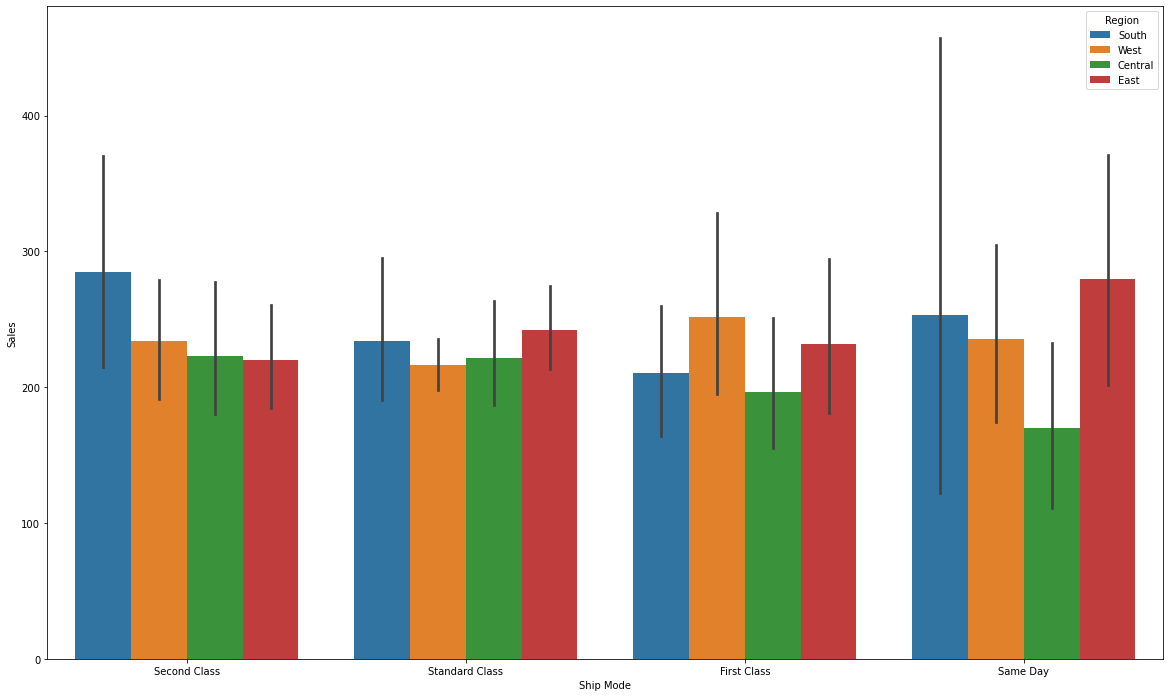

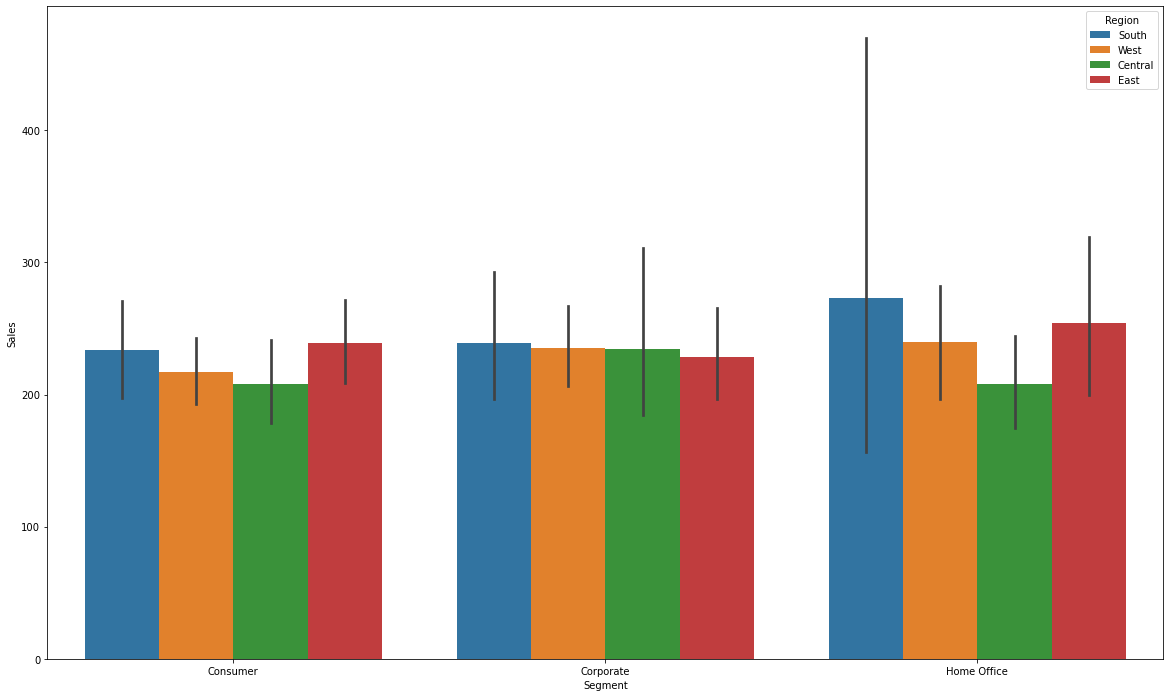

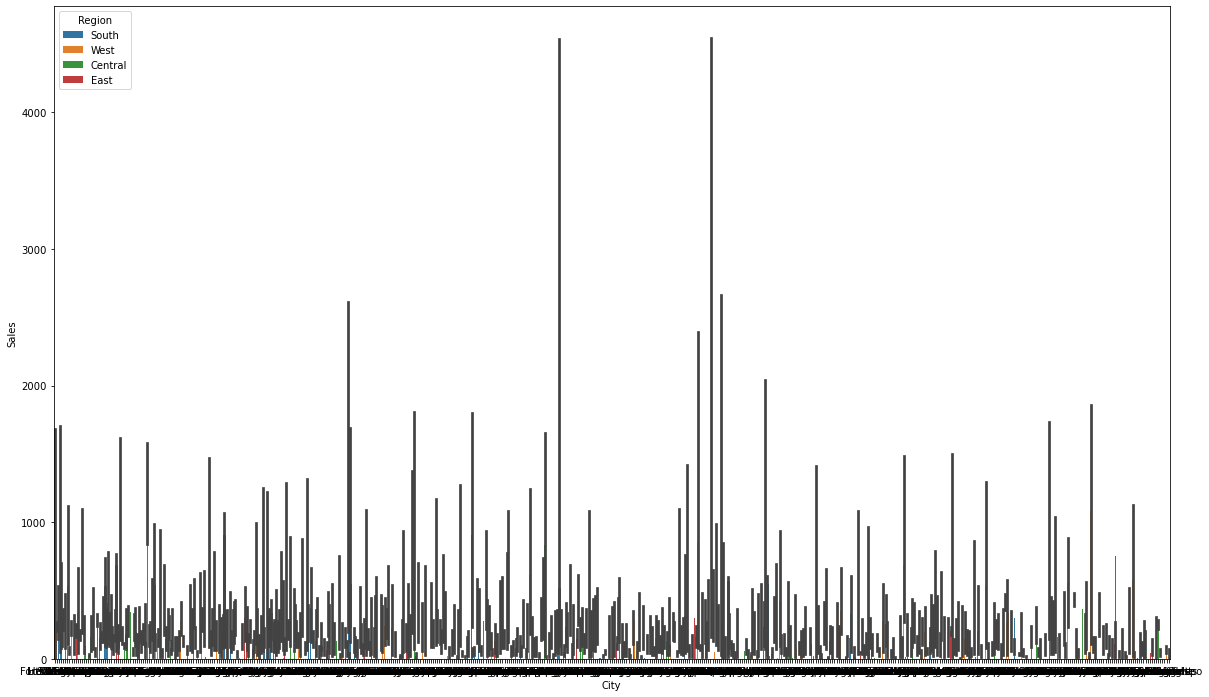

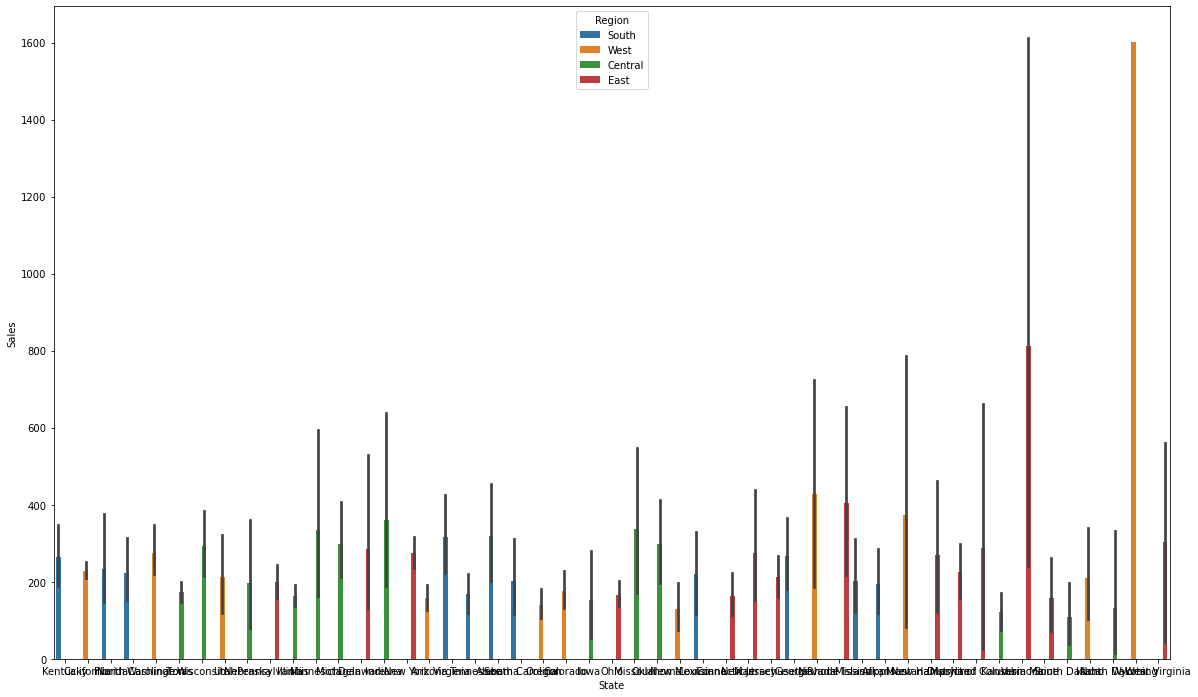

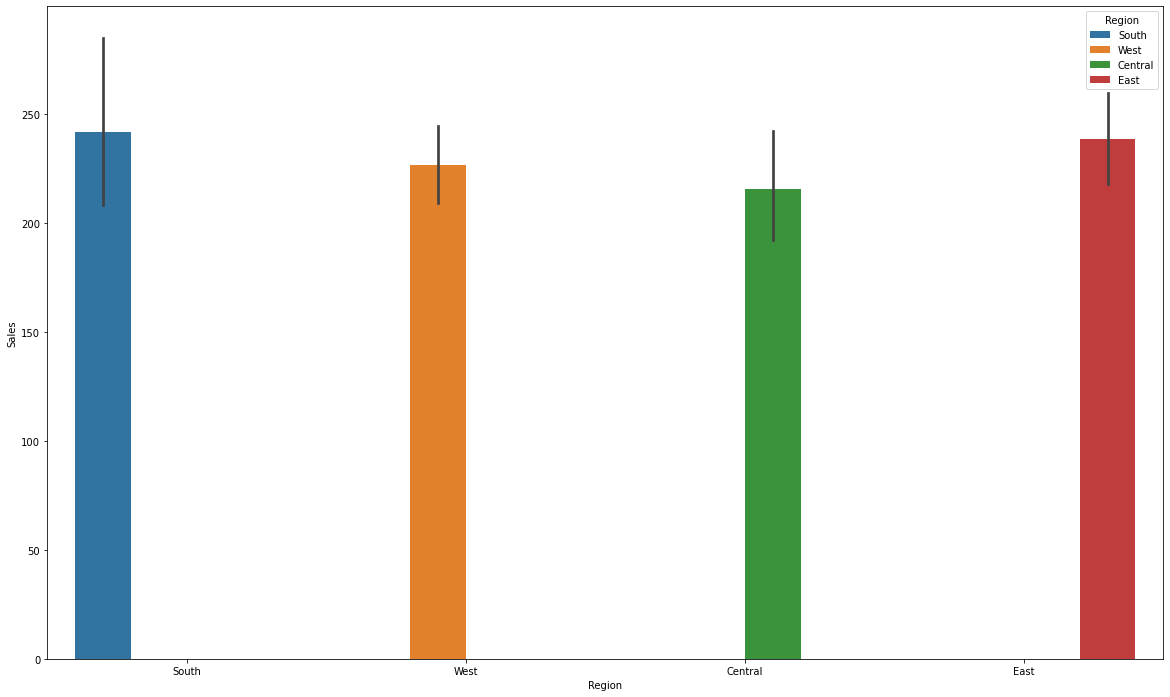

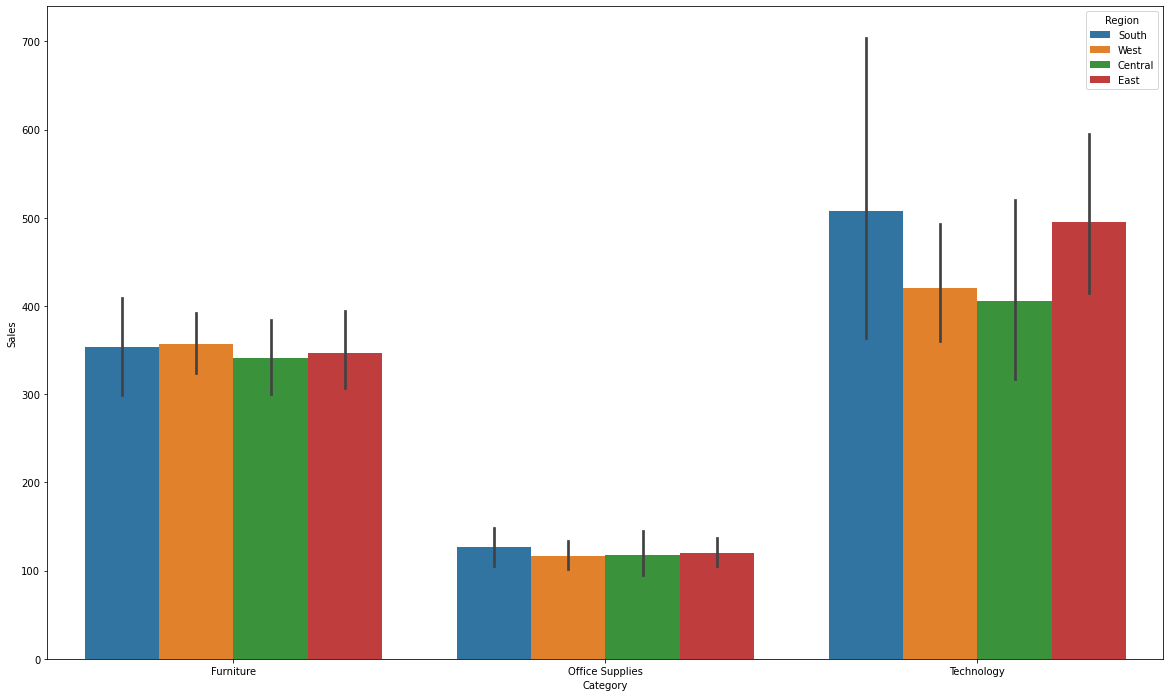

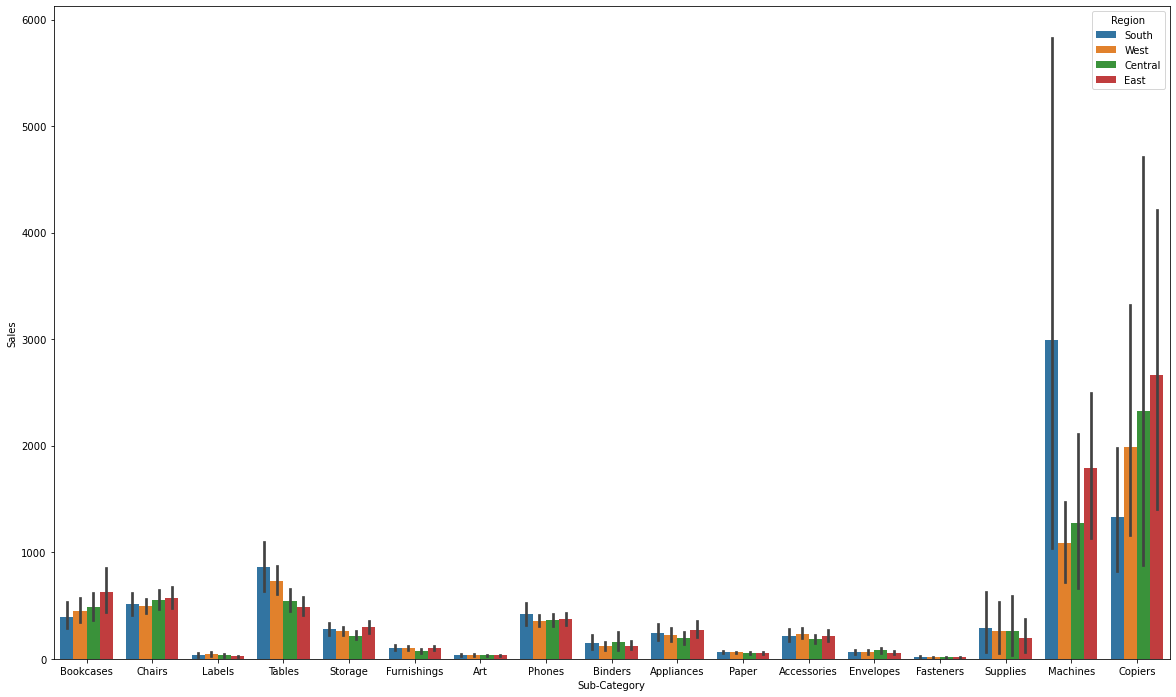

In [13]:
for columns in categorical_columns[:-1]:
    plt.figure(figsize=(20,12))
    sns.barplot(data=data,x=columns,y='Sales',hue='Region')
    plt.show()

<AxesSubplot:>

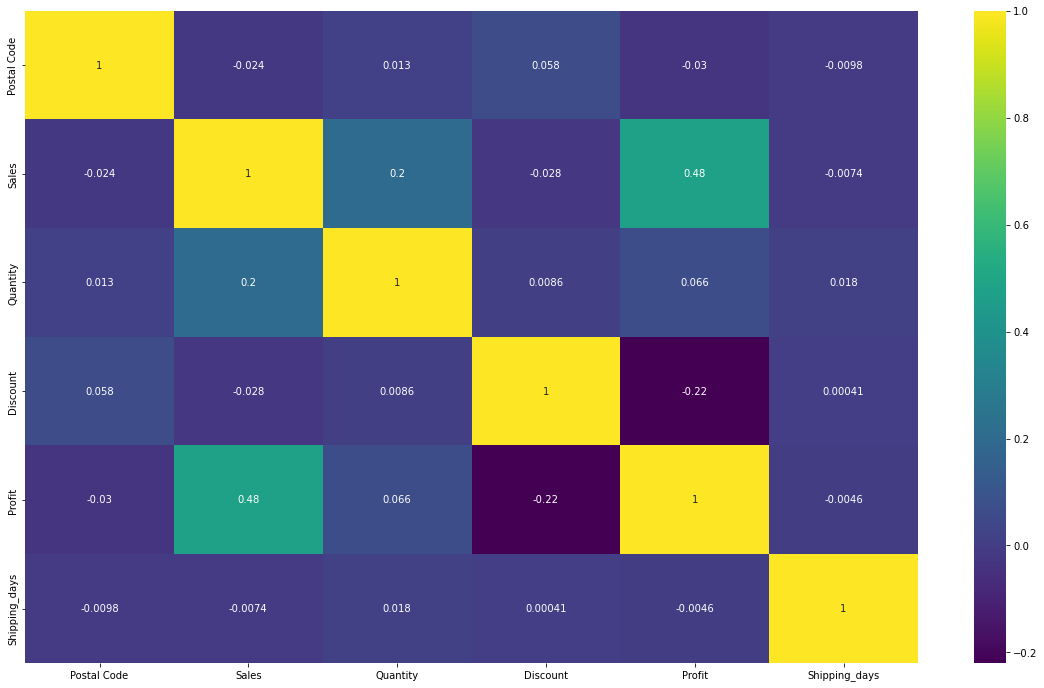

In [14]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

### As we see there isnt much correlation between the different attributes  barring the Postal code as it is a discrete variable

In [15]:
categorical_columns.drop(['City','State'])

Index(['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category',
       'Product Name'],
      dtype='object')

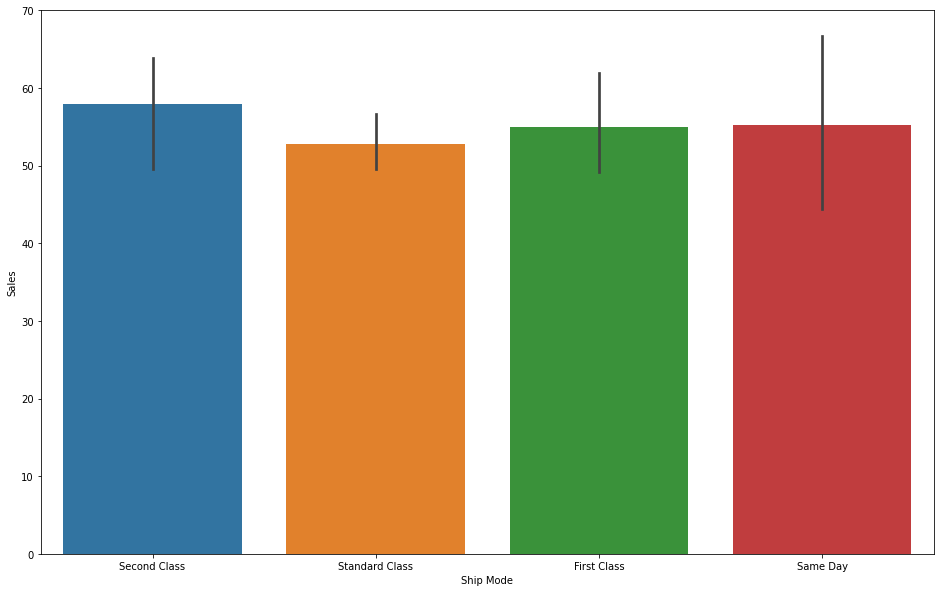

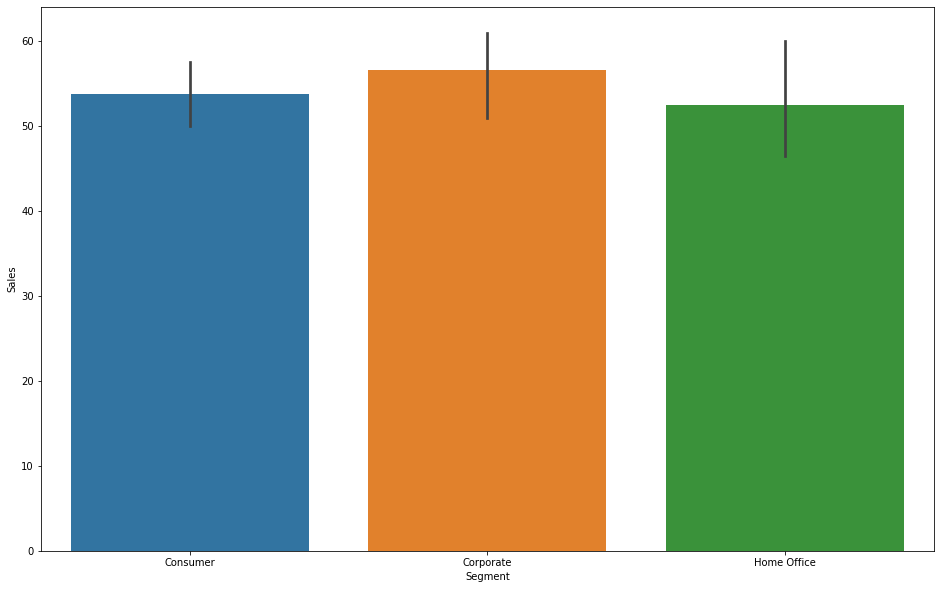

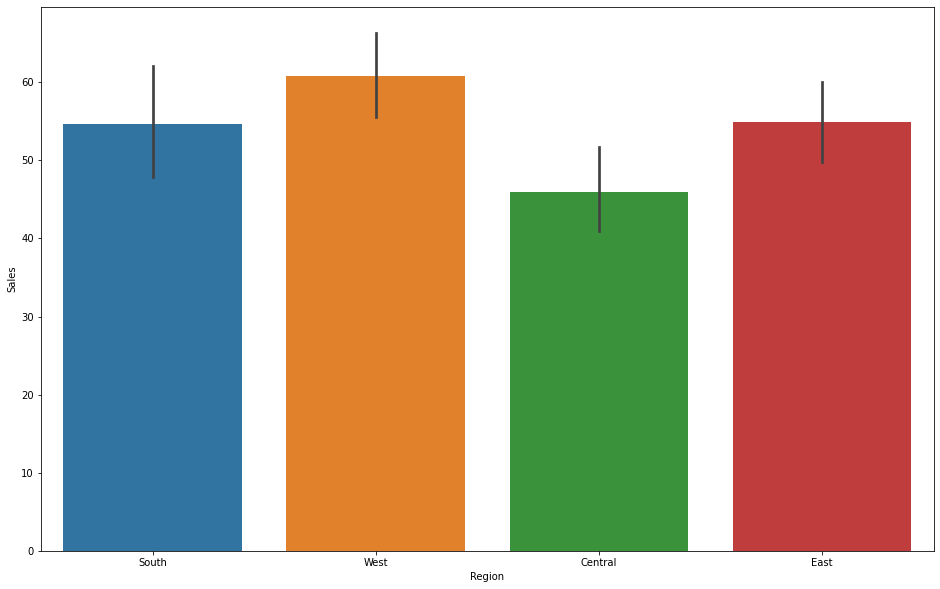

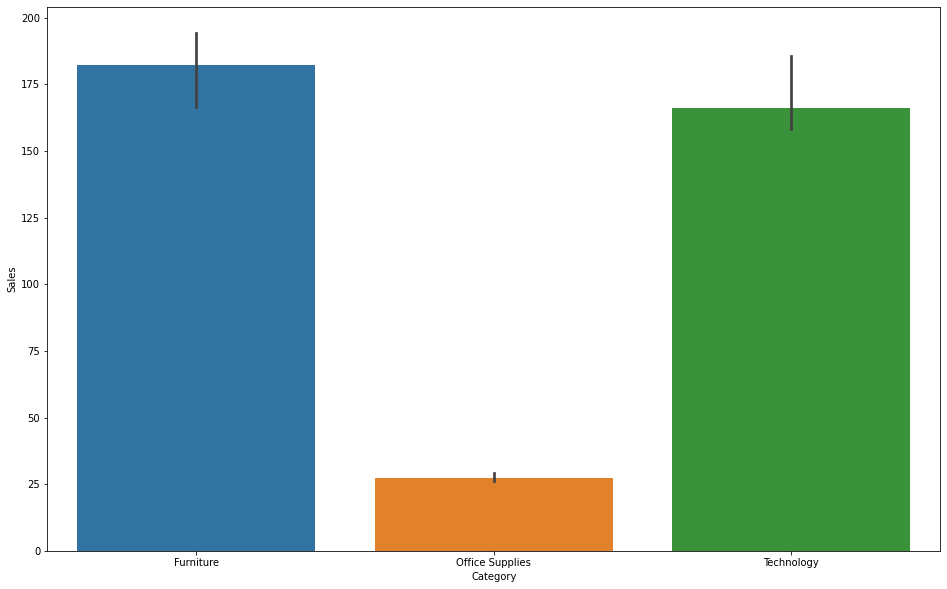

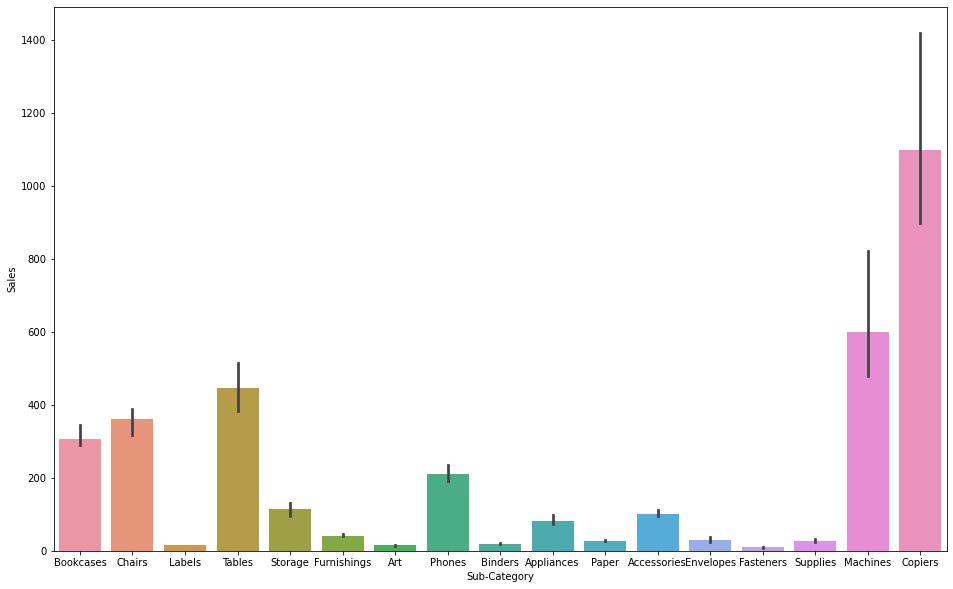

In [16]:
for column in categorical_columns.drop(['City','State','Product Name']):
    plt.figure(figsize=(16,10))
    sns.barplot(data=data,x=column,y='Sales',estimator=np.median)
    plt.show()

### Inferences for different categories on Sales
 1. Different Shipping modes dont have much influence on the Sales but Same day delivery has generated more sales
 2. Different Customer Segments dont have much influence on the Sales but Home office has slightly better Sales
 3. Different Regions dont have much influence on the Sales there is very less difference but South region does have better Sales
 4. Different Categories have different sales and Technology has better sales compared to Furniture Supplies
 5. Different Sub Categories have different sales and Copiers and Machines have better sales compared to other sub categories

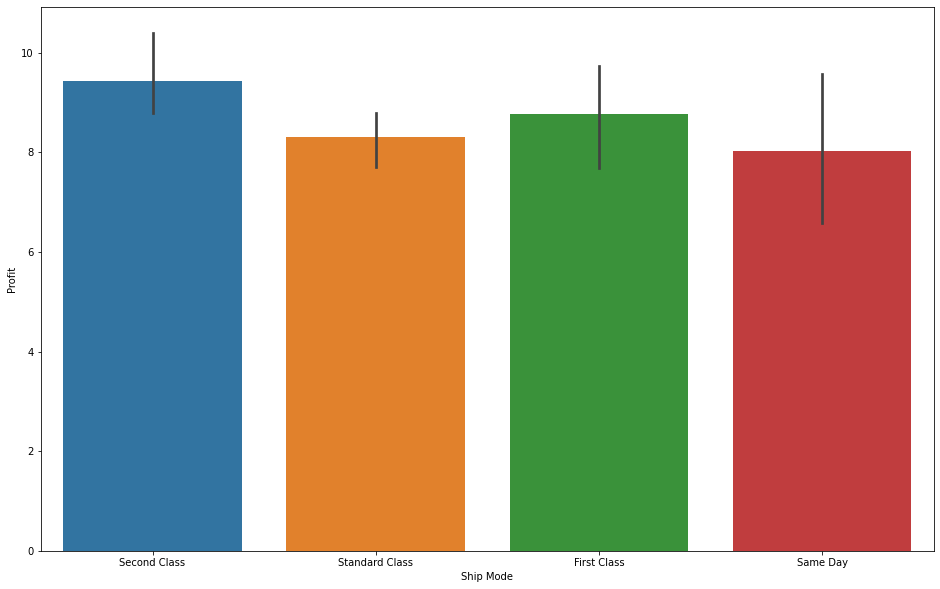

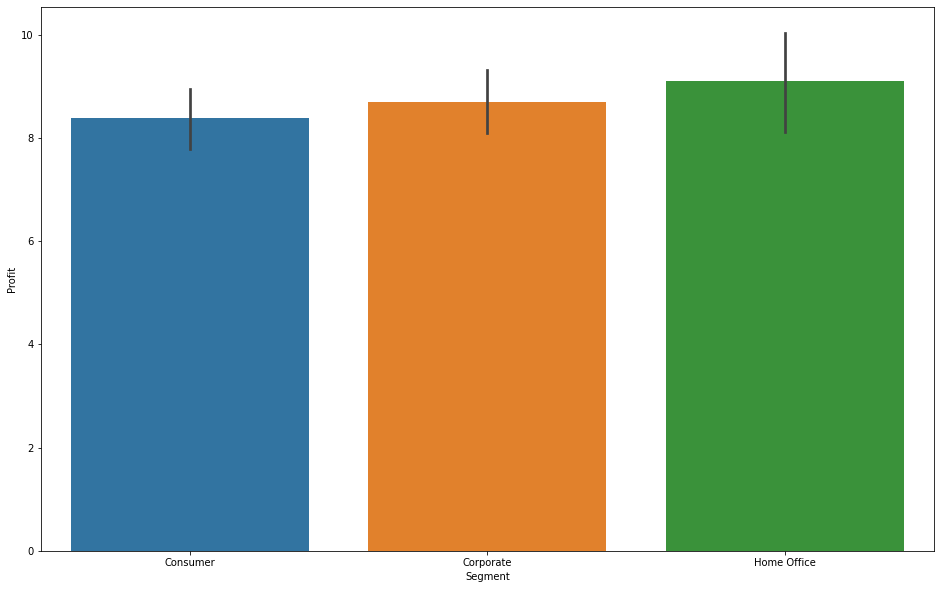

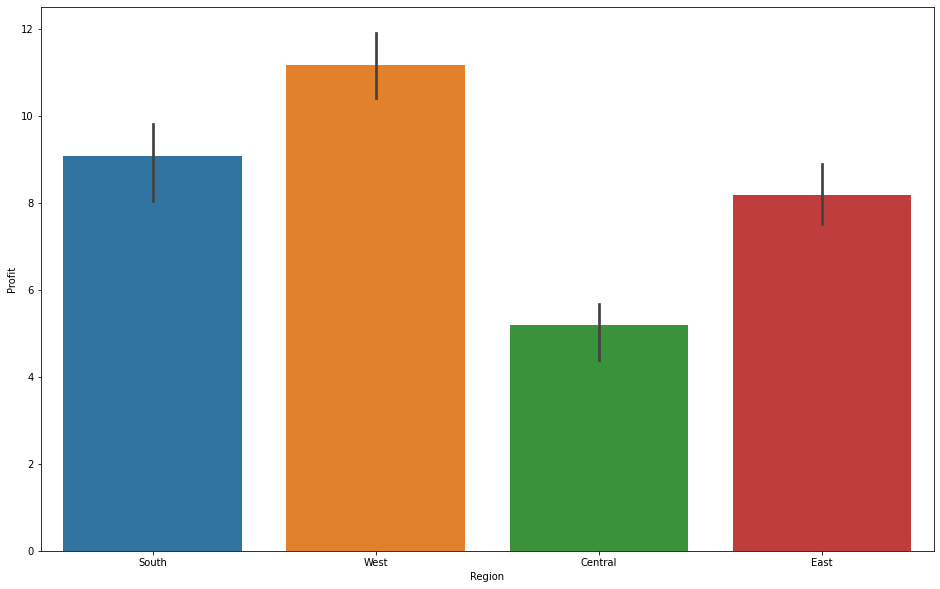

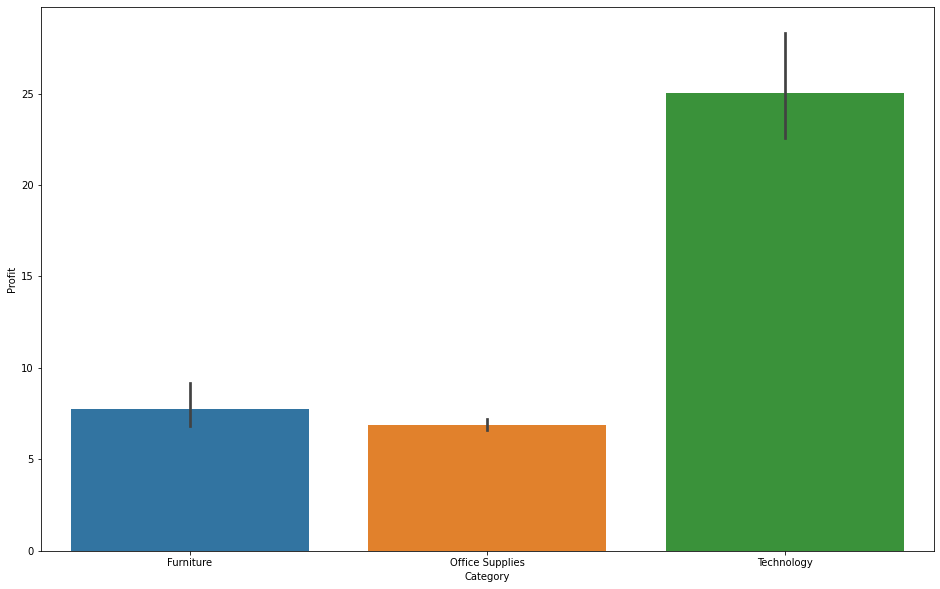

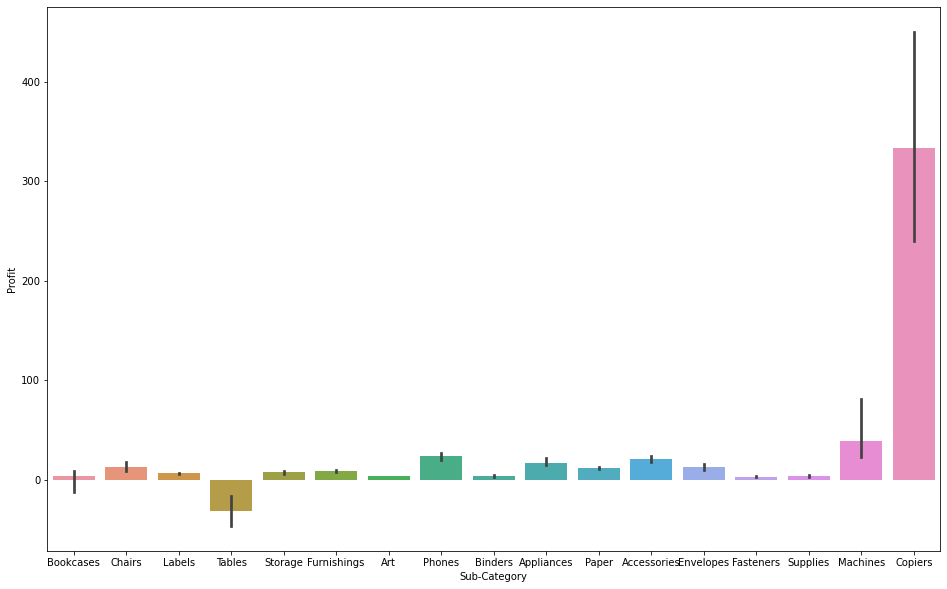

In [17]:
for column in categorical_columns.drop(['City','State','Product Name']):
    plt.figure(figsize=(16,10))
    sns.barplot(data=data,x=column,y='Profit',estimator=np.median)
    plt.show()

### Inferences for different categories on Profit
 1. Major profits are incured in First class and Same day delivery for shipping modes
 2. Different Customer Segments have generated varied profits with home office generating consistent proifts
 3. Different Regions are generating varied profits with West and East performing better and central not performing better so its good to focus less on Central
 4. Different Categories have different Profits and Technology has better Profits compared to Office and Furniture adn focus should be more on Technolgy
 5. Different Sub Categories have different Profits and Copiers are generating consistent profits as opposed to Machines which are incuring losses eventhough sales of Machines is good the profits arent good

In [18]:
data[categorical_columns]

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System
...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5"""


In [19]:
def plot_curve(df,column,y):
    fig,axes=plt.subplots(2,3,figsize=(20,10))
    fig.suptitle(f"plot for {column}")
    sns.axisgrid
    sns.barplot(ax=axes[0,0],data=df,x=column,y=y,hue=categorical_columns[0],estimator=np.median) 
    sns.barplot(ax=axes[0,1],data=df,x=column,y=y,hue=categorical_columns[1],estimator=np.median)
    # sns.barplot(ax=axes[0,0],data=df,x=column,y=y,hue=categorical_columns[2])
    # sns.barplot(ax=axes[0,0],data=df,x=column,y=y,hue=categorical_columns[3])
    sns.barplot(ax=axes[0,2],data=df,x=column,y=y,hue=categorical_columns[4],estimator=np.median)
    sns.barplot(ax=axes[1,0],data=df,x=column,y=y,hue=categorical_columns[5],estimator=np.median)
    sns.barplot(ax=axes[1,1],data=df,x=column,y=y,hue=categorical_columns[6],estimator=np.median)

In [20]:
categorical_columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Product Name'],
      dtype='object')

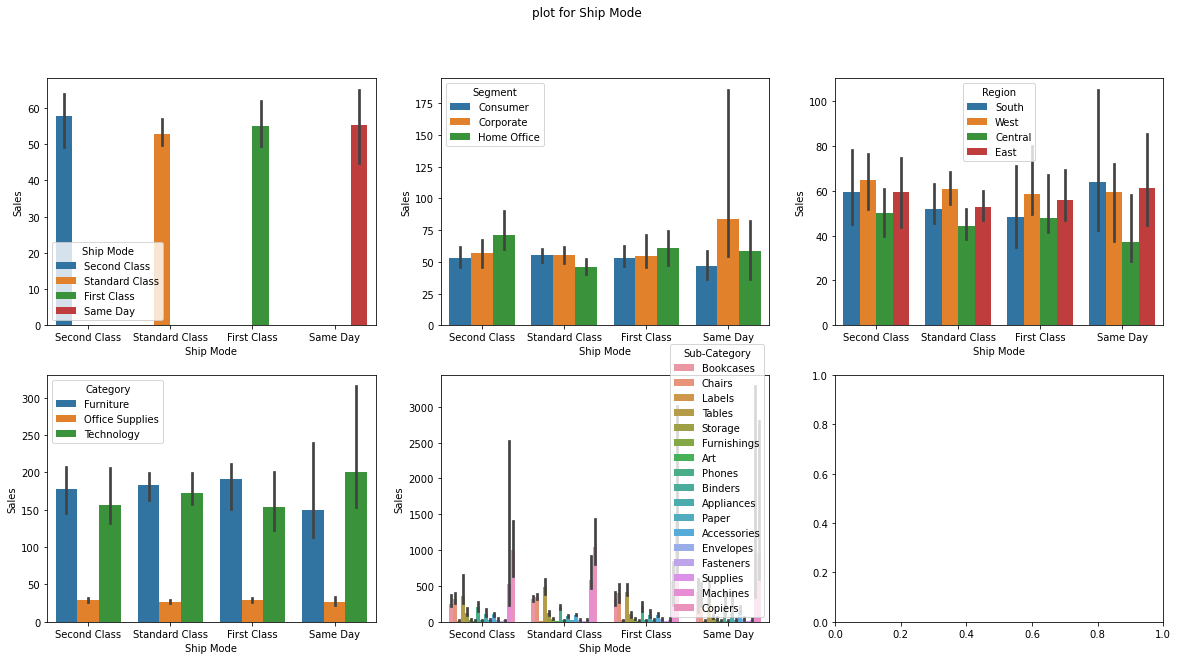

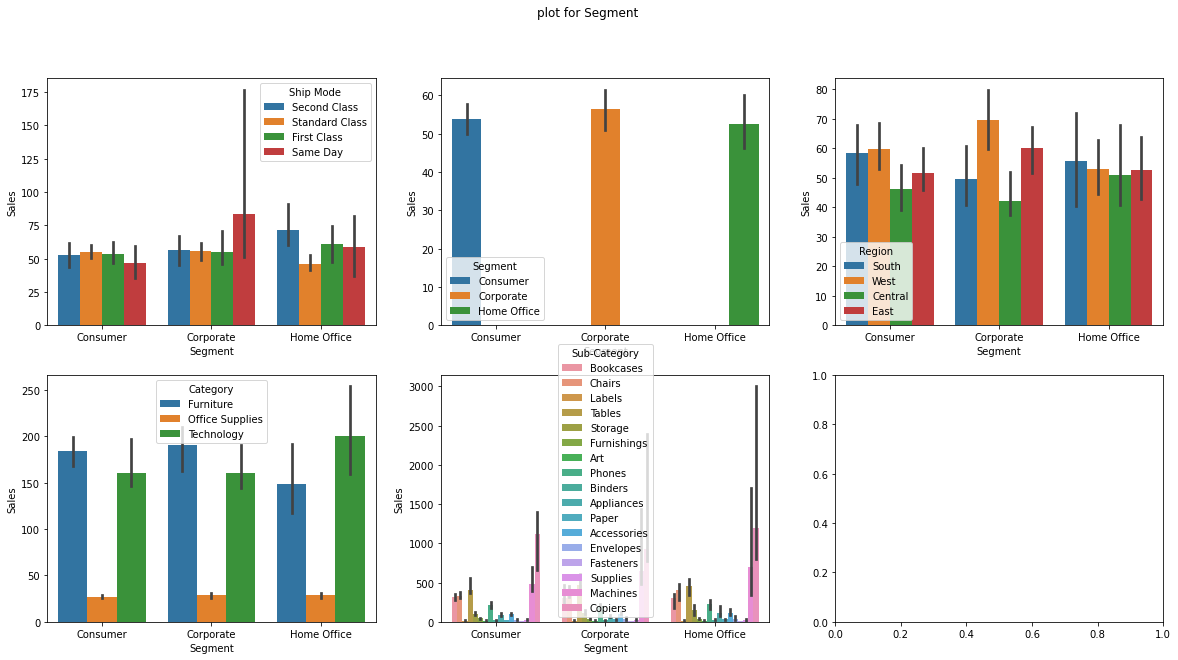

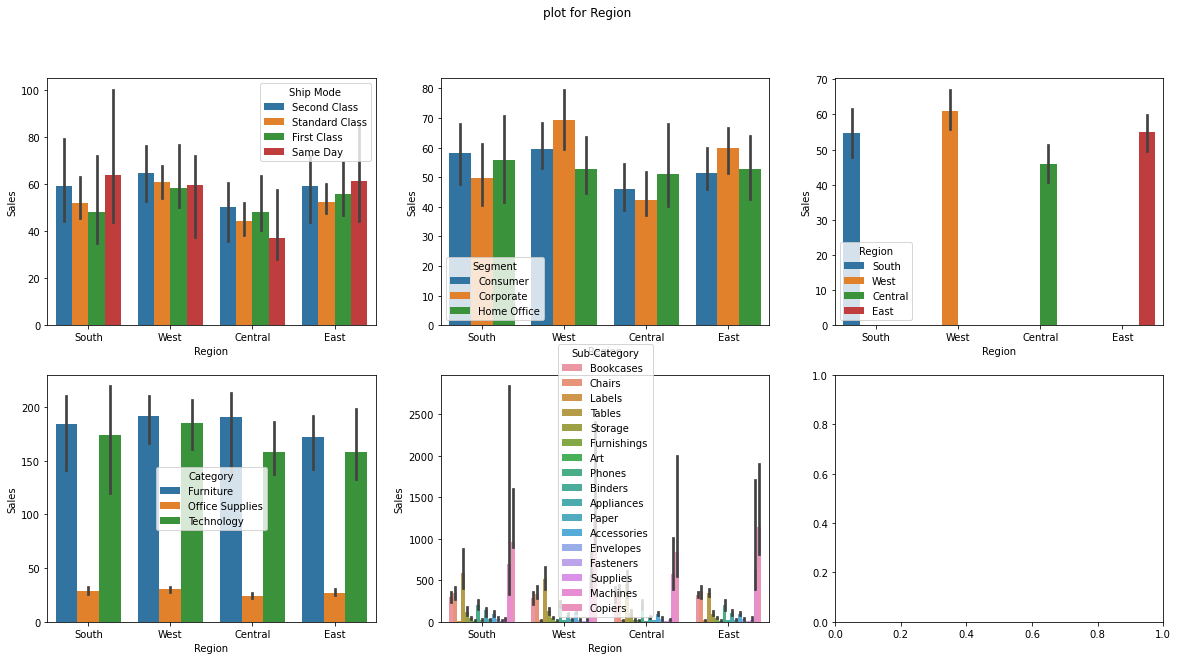

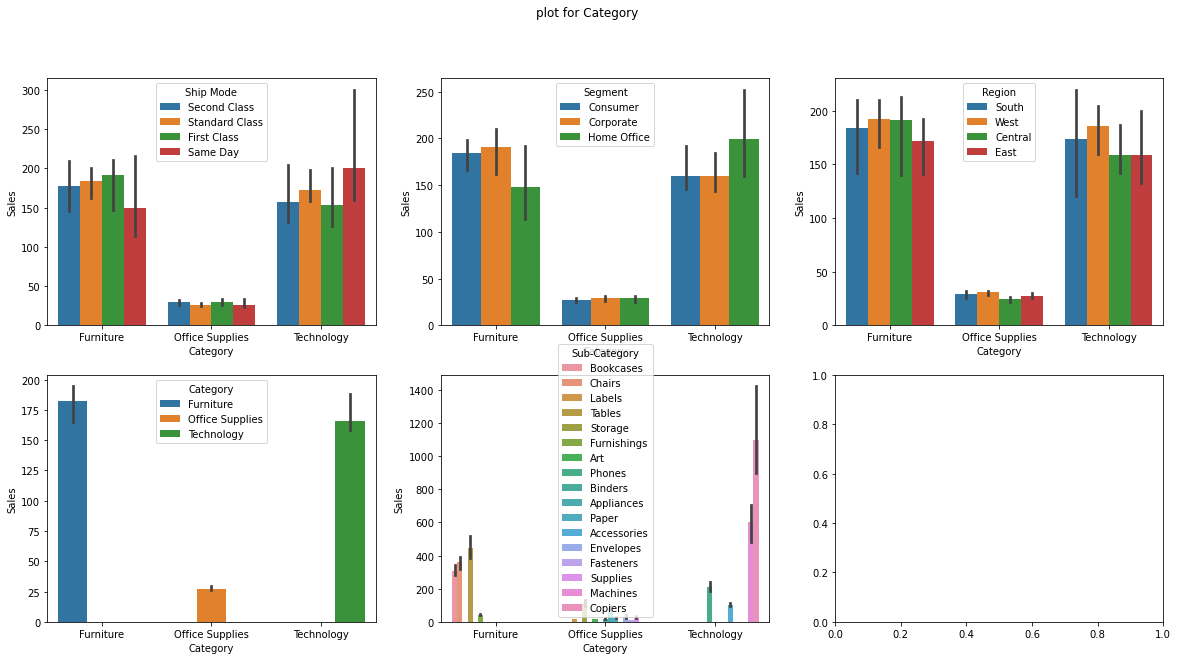

In [21]:
for column in categorical_columns.drop(['City','State','Product Name','Sub-Category']):
    plot_curve(data,column,'Sales') 

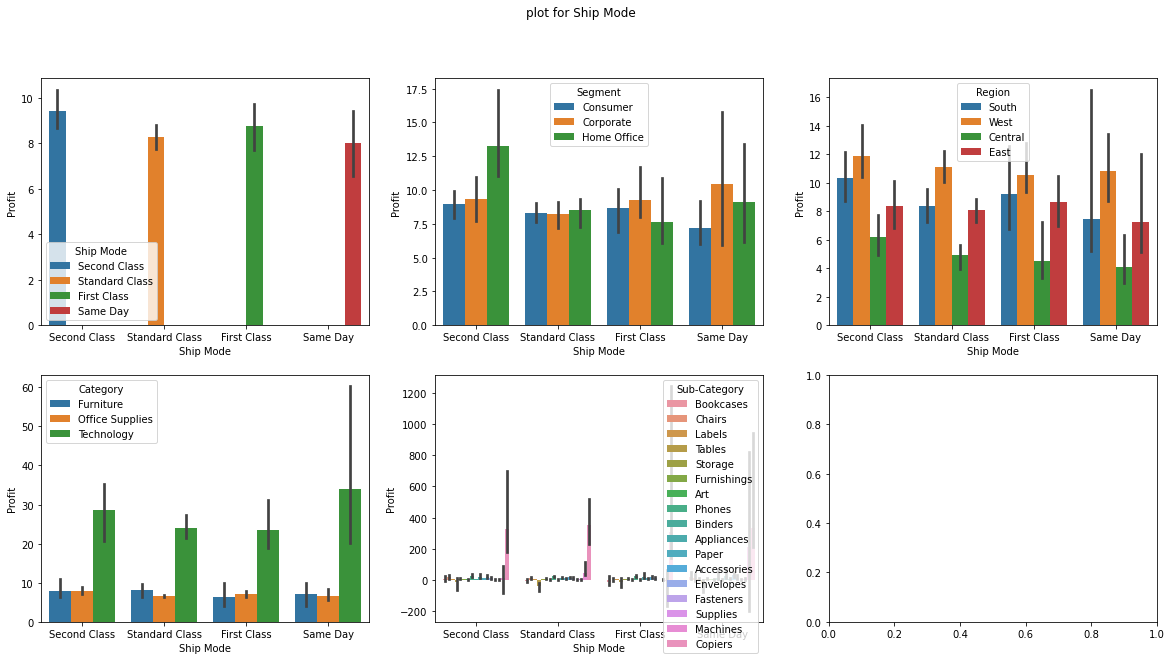

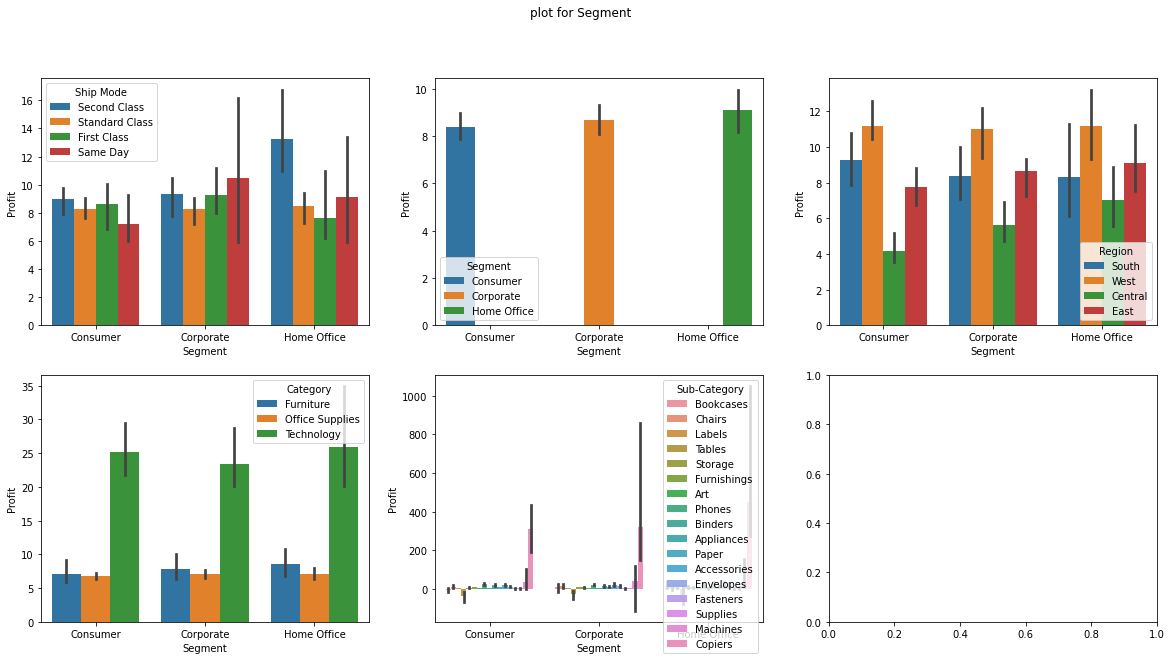

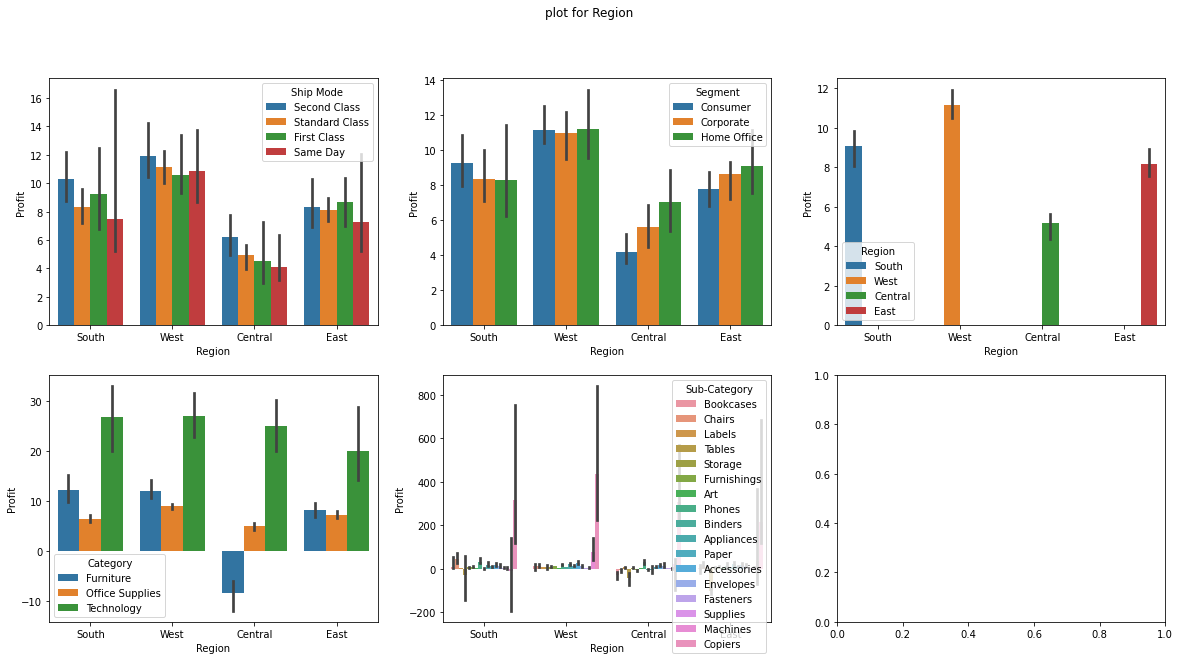

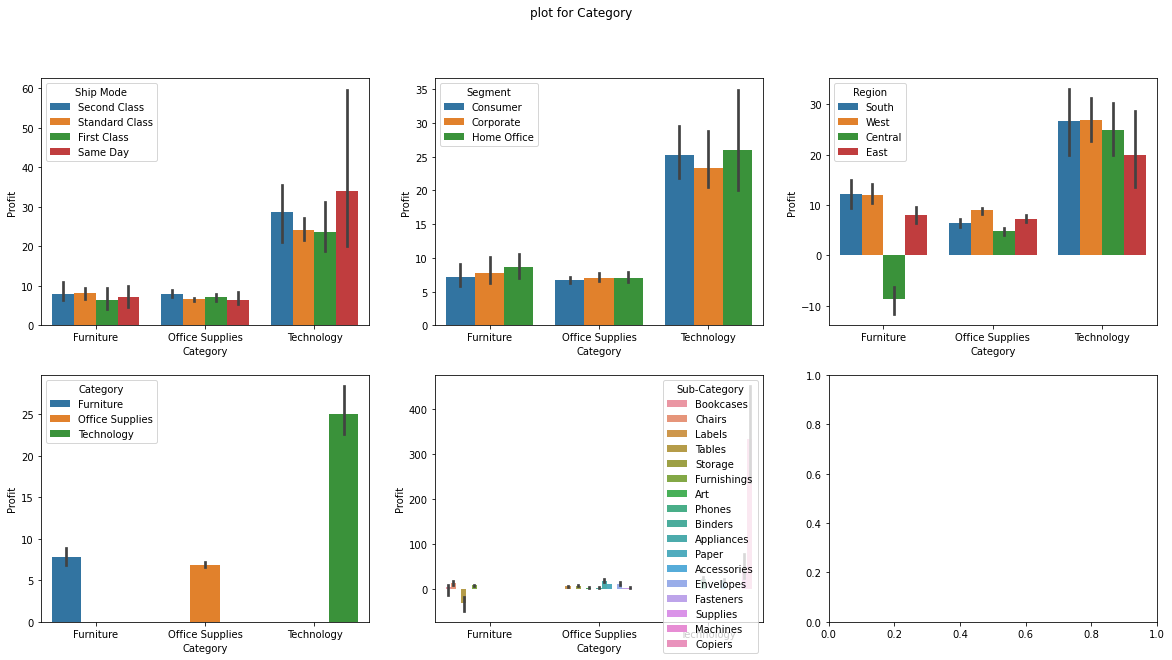

In [22]:
for column in categorical_columns.drop(['City','State','Product Name','Sub-Category']):
    plot_curve(data,column,'Profit') 

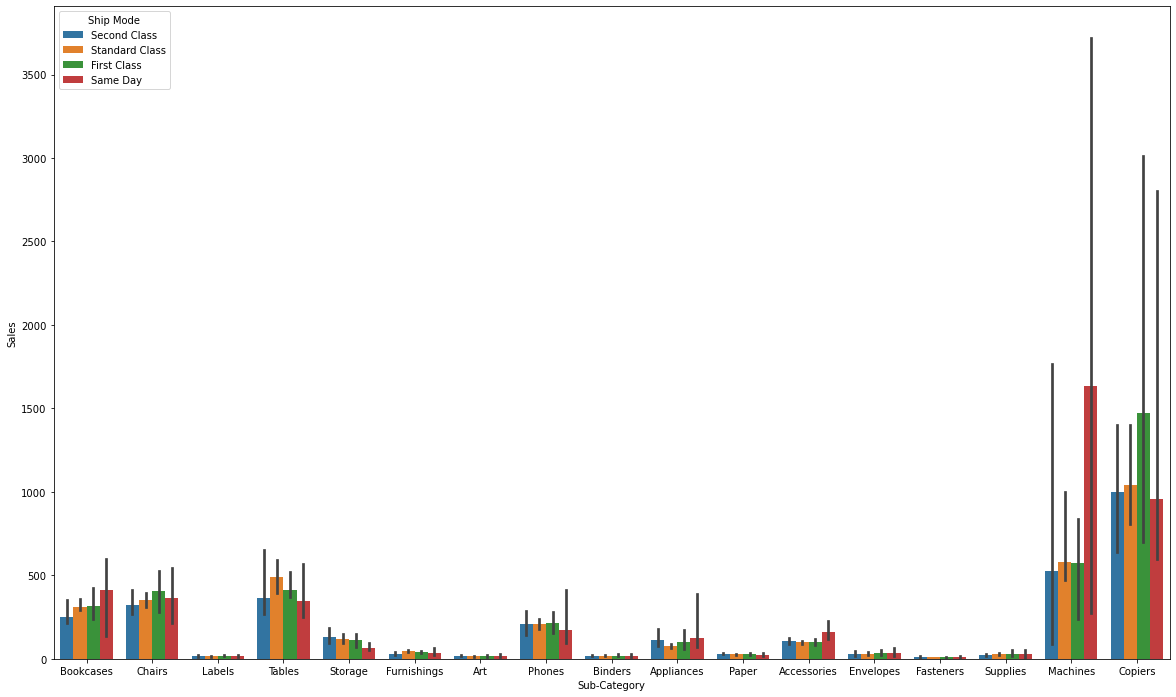

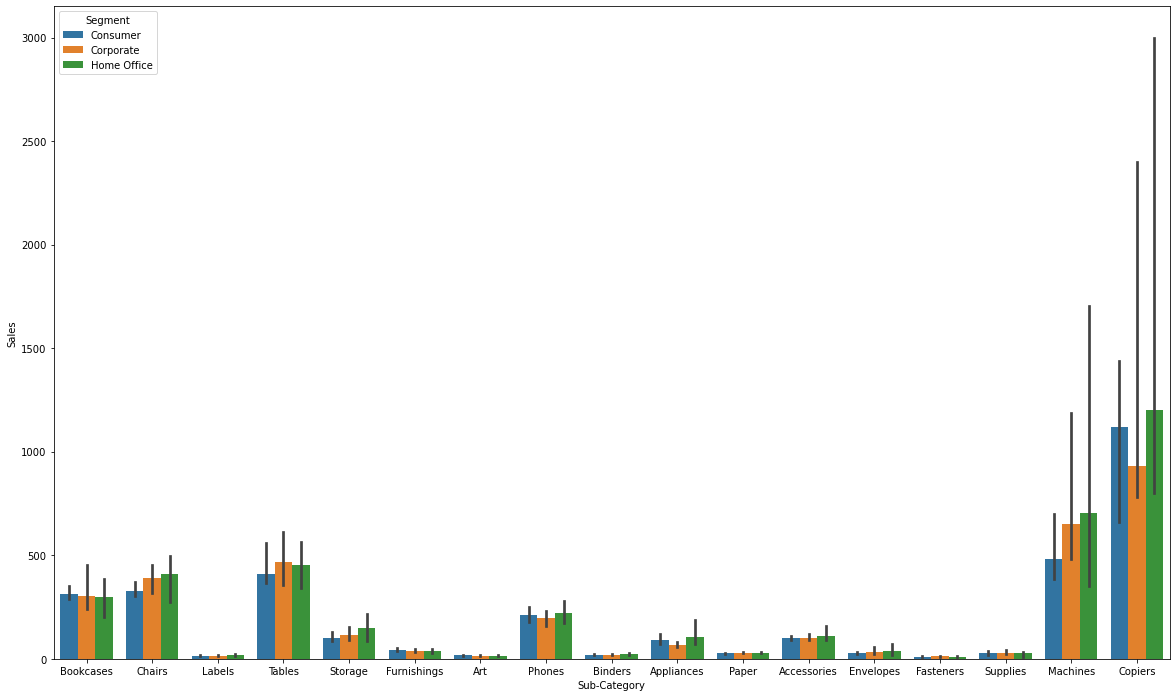

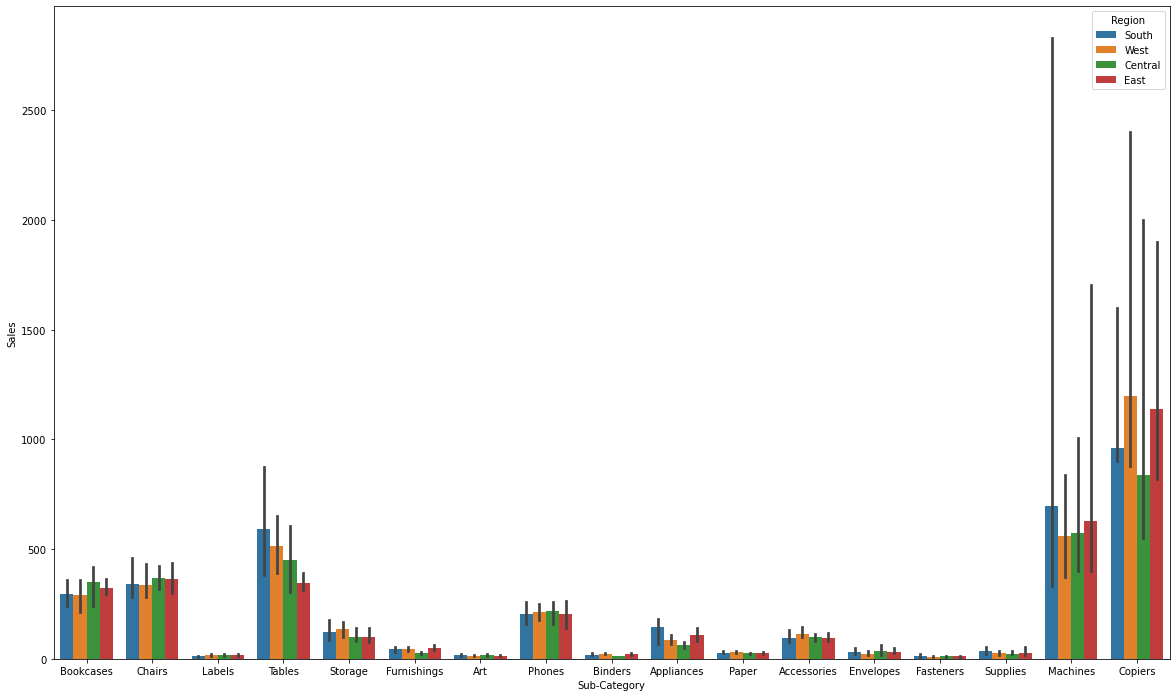

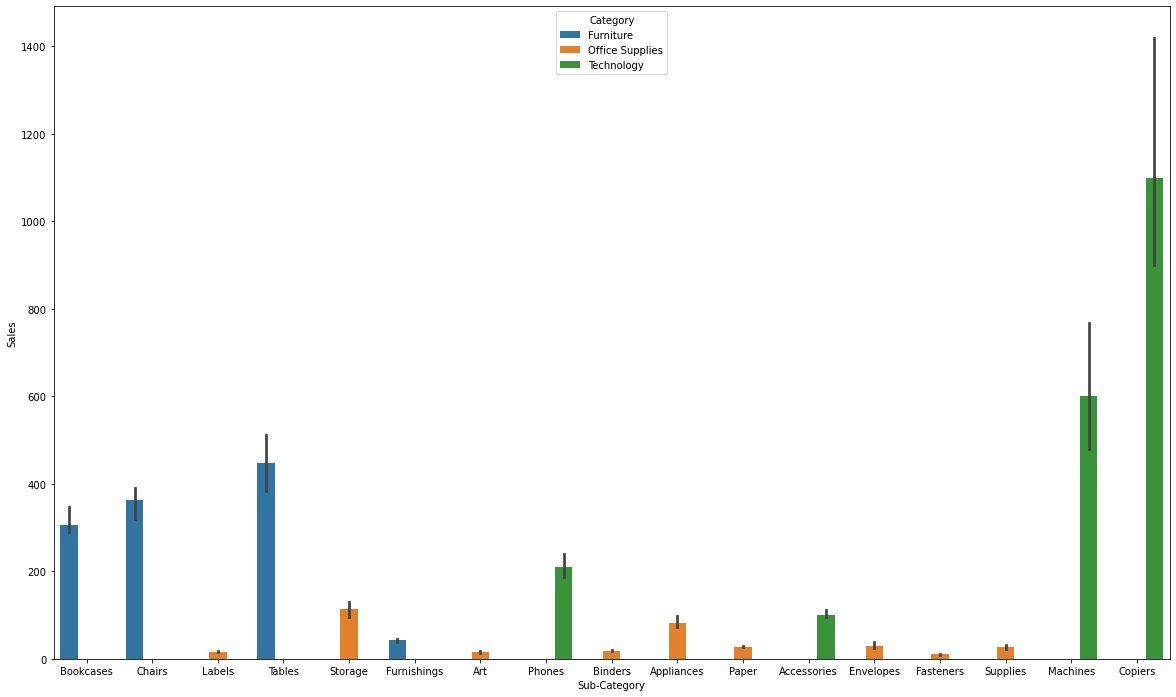

In [23]:
for columns in categorical_columns.drop(['City','State','Product Name','Sub-Category']):
    plt.figure(figsize=(20,12))
    sns.barplot(data=data,x='Sub-Category',y='Sales',hue=columns,estimator=np.median)
    plt.show()

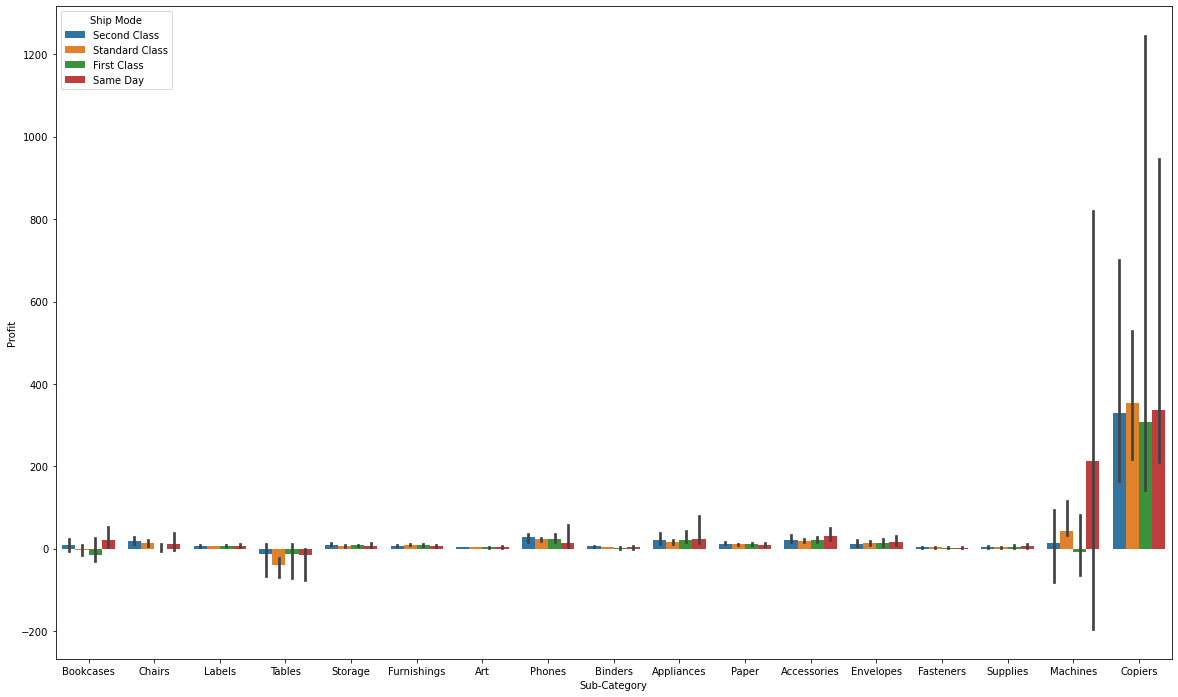

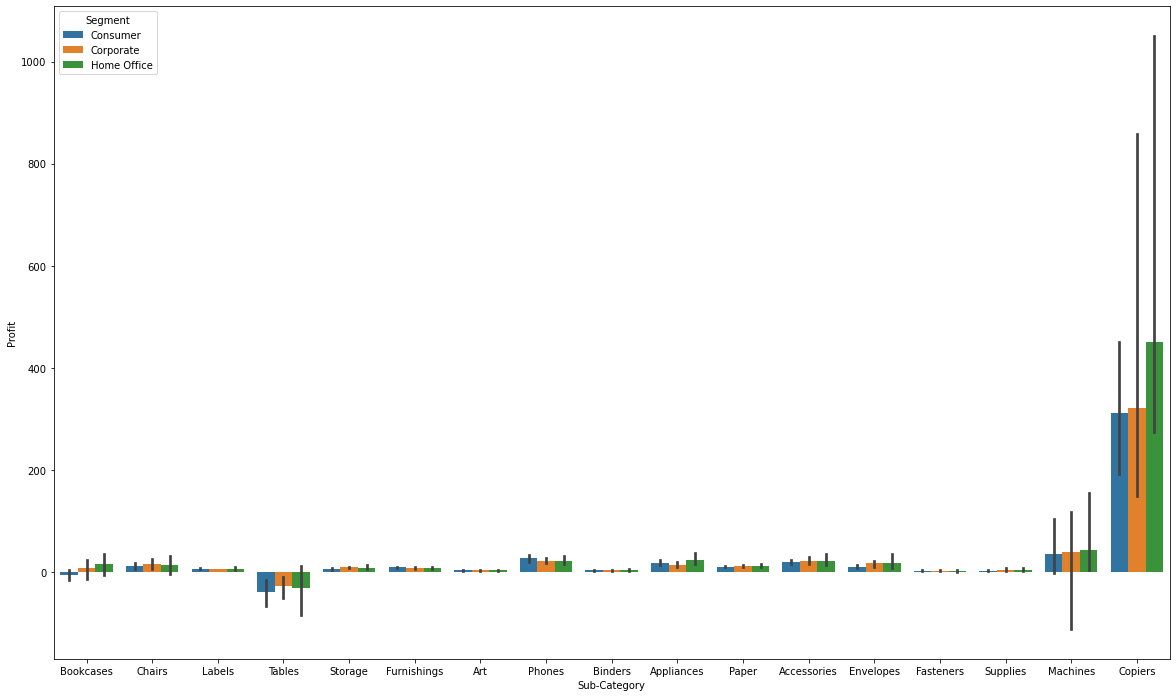

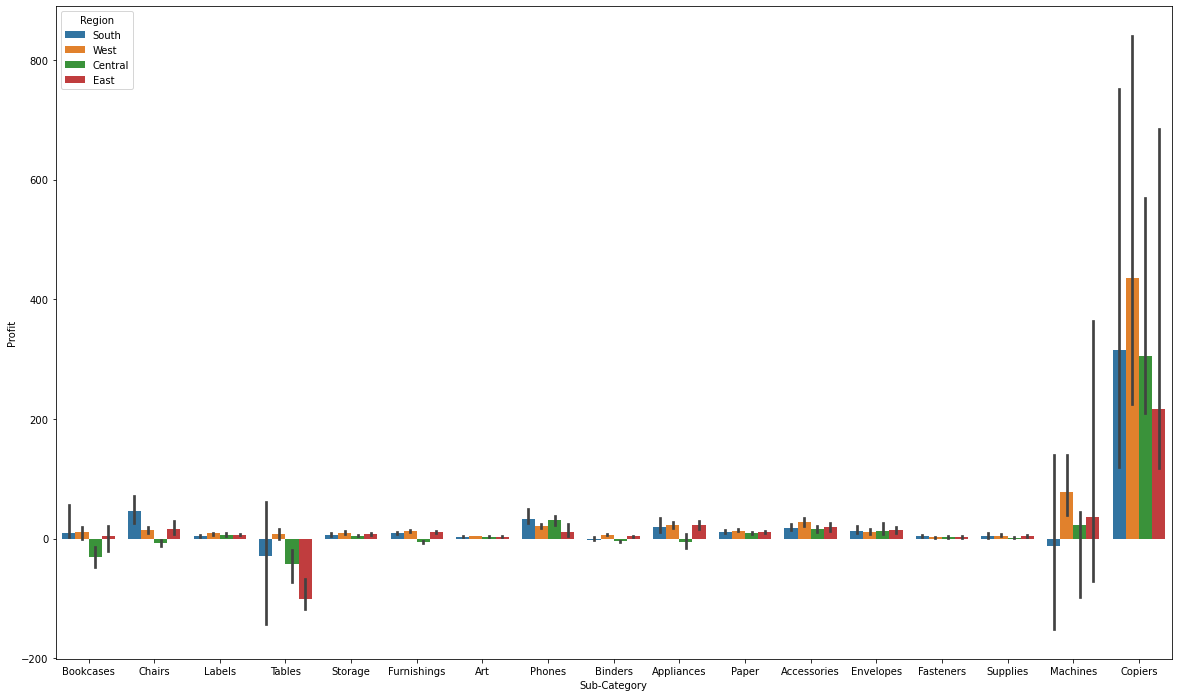

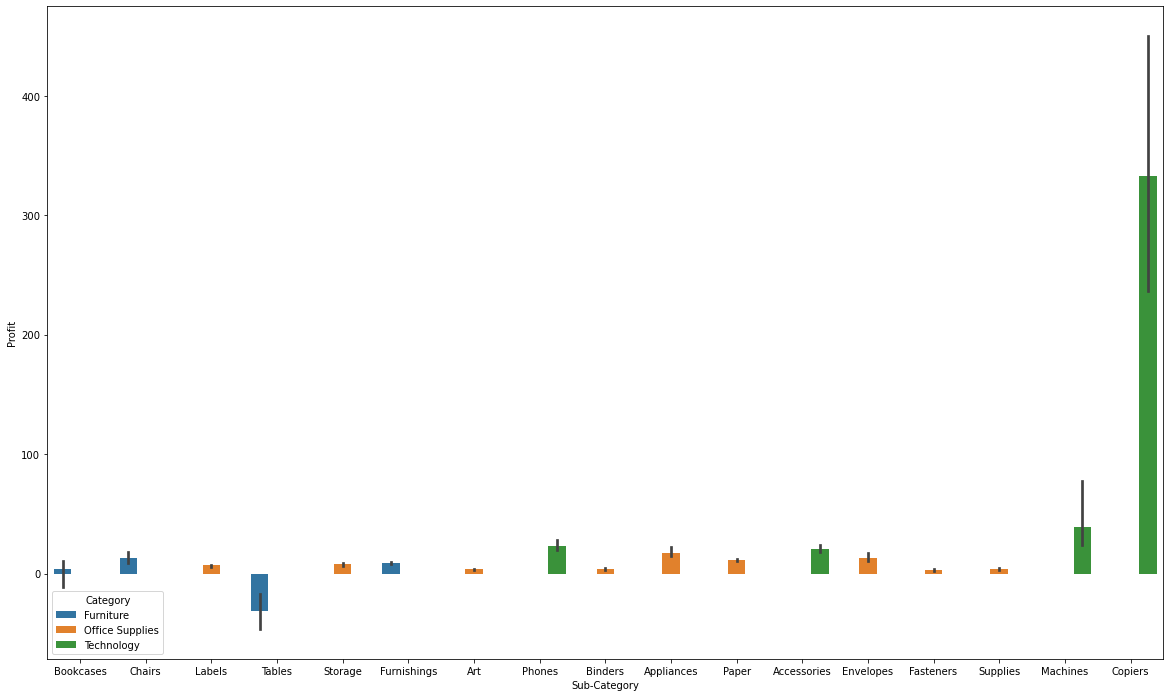

In [24]:
for columns in categorical_columns.drop(['City','State','Product Name','Sub-Category']):
    plt.figure(figsize=(20,12))
    sns.barplot(data=data,x='Sub-Category',y='Profit',hue=columns,estimator=np.median)
    plt.show()

### 
* ### Whatever Region Customer segment Ship mode Machines are very volatile and incuring losses as well as profit which means they are breaking even with the cost while on the other hand 
* ### Copiers have been proven to be profitable across all the dimensions
* ### Looking at others the Sales dont seem to be that high due to which profit margins are very minimal but furnitures are incuring loses

In [25]:
data

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping_days
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,5
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,5
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,5


In [26]:
data.groupby('Ship Mode')['Sales'].agg('mean').to_dict()

{'First Class': 228.49702399219765,
 'Same Day': 236.39617863720073,
 'Second Class': 236.0892387660668,
 'Standard Class': 227.58306685656837}

In [27]:
for column in categorical_columns.drop(['City', 'State','Sub-Category', 'Product Name']):
    print(f"The unique items in {column} are {data[column].nunique()}")

The unique items in Ship Mode are 4
The unique items in Segment are 3
The unique items in Region are 4
The unique items in Category are 3


In [28]:
for column in categorical_columns:
    print(f"The unique items in {column} are {data[column].nunique()}")

The unique items in Ship Mode are 4
The unique items in Segment are 3
The unique items in City are 531
The unique items in State are 49
The unique items in Region are 4
The unique items in Category are 3
The unique items in Sub-Category are 17
The unique items in Product Name are 1850


In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False,drop='first')
# ohe.fit(data[categorical_columns.drop(['City', 'State','Sub-Category', 'Product Name'])])

In [30]:
# ohe.transform(data[categorical_columns.drop(['City', 'State','Sub-Category', 'Product Name'])])

In [31]:
categorical_columns.drop([ 'City','State','Sub-Category', 'Product Name'])

Index(['Ship Mode', 'Segment', 'Region', 'Category'], dtype='object')

In [32]:
onehotencoded=ohe.fit_transform(data[categorical_columns.drop([ 'City','State','Sub-Category', 'Product Name'])])

In [33]:
onehotencoded=ohe.fit_transform(data[categorical_columns.drop([ 'City','State','Sub-Category', 'Product Name'])])
columns=ohe.get_feature_names_out()
data[columns]=onehotencoded
data.drop(categorical_columns.drop(['City','State','Sub-Category', 'Product Name']),axis=1,inplace=True)

In [34]:
dum=pd.read_excel("Sample - Superstore.xls")

In [110]:
dum.iloc[3125]

Row ID                                      3126
Order ID                          CA-2015-121720
Order Date                   2015-06-11 00:00:00
Ship Date                    2015-06-12 00:00:00
Ship Mode                            First Class
Customer ID                             JE-15610
Customer Name                            Jim Epp
Segment                                Corporate
Country                            United States
City                                    Lakeland
State                                    Florida
Postal Code                                33801
Region                                     South
Product ID                       OFF-ST-10003816
Category                         Office Supplies
Sub-Category                             Storage
Product Name     Fellowes High-Stak Drawer Files
Sales                                    563.808
Quantity                                       4
Discount                                     0.2
Profit              

In [123]:
data.iloc[3125].to_dict()

{'City': 58.356,
 'State': 41.47200000000001,
 'Postal Code': 58.356,
 'Sub-Category': 113.92800000000001,
 'Product Name': 493.332,
 'Sales': 563.808,
 'Quantity': 4.0,
 'Discount': 0.2,
 'Profit': 21.142799999999966,
 'Shipping_days': 1.0,
 'Ship Mode_Same Day': 0.0,
 'Ship Mode_Second Class': 0.0,
 'Ship Mode_Standard Class': 0.0,
 'Segment_Corporate': 1.0,
 'Segment_Home Office': 0.0,
 'Region_East': 0.0,
 'Region_South': 1.0,
 'Region_West': 0.0,
 'Category_Office Supplies': 1.0,
 'Category_Technology': 0.0}

In [35]:
dum.iloc[3125].to_dict()

{'Row ID': 3126,
 'Order ID': 'CA-2015-121720',
 'Order Date': Timestamp('2015-06-11 00:00:00'),
 'Ship Date': Timestamp('2015-06-12 00:00:00'),
 'Ship Mode': 'First Class',
 'Customer ID': 'JE-15610',
 'Customer Name': 'Jim Epp',
 'Segment': 'Corporate',
 'Country': 'United States',
 'City': 'Lakeland',
 'State': 'Florida',
 'Postal Code': 33801,
 'Region': 'South',
 'Product ID': 'OFF-ST-10003816',
 'Category': 'Office Supplies',
 'Sub-Category': 'Storage',
 'Product Name': 'Fellowes High-Stak Drawer Files',
 'Sales': 563.808,
 'Quantity': 4,
 'Discount': 0.2,
 'Profit': 21.142799999999966}

In [124]:
dum.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [36]:
# onehotencoded=ohe.fit_transform(data[categorical_columns.drop(['City', 'State','Sub-Category', 'Product Name'])])
# columns=ohe.get_feature_names()
# data[columns]=onehotencoded
# data.drop(categorical_columns.drop(['City', 'State','Sub-Category', 'Product Name']),axis=1,inplace=True)

In [37]:
data

,City,State,Postal Code,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping_days,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,Region_East,Region_South,Region_West,Category_Office Supplies,Category_Technology
0,Henderson,Kentucky,42420,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Henderson,Kentucky,42420,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Los Angeles,California,90036,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,Fort Lauderdale,Florida,33311,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Fort Lauderdale,Florida,33311,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Miami,Florida,33180,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9990,Costa Mesa,California,92627,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9991,Costa Mesa,California,92627,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9992,Costa Mesa,California,92627,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [38]:
for column in ['City', 'State','Sub-Category', 'Product Name','Postal Code']:
    print(f"The unique items in {column} are {data[column].nunique()}")

The unique items in City are 531
The unique items in State are 49
The unique items in Sub-Category are 17
The unique items in Product Name are 1850
The unique items in Postal Code are 631


In [39]:
# for column in [ 'State','Sub-Category', 'Product Name','Postal Code']:
#     print(f"The unique items in {column} are {data[column].nunique()}")

### We are left with 4 more categorical and one ordinal column Postal code we will drop them 

In [40]:
for column in ['City','State','Sub-Category', 'Product Name','Postal Code']:
    col_encoded=data.groupby(column)['Sales'].agg('median').sort_values(ascending=True).to_dict()
    data[column]=data[column].map(col_encoded)

In [41]:
# for column in ['City','Sub-Category']:
#     col_encoded=data.groupby(column)['Sales'].agg('median').sort_values(ascending=True).to_dict()
#     data[column]=data[column].map(col_encoded)

In [42]:
# for column in ['Sub-Category']:
#     col_encoded=data.groupby(column)['Sales'].agg('median').sort_values(ascending=True).to_dict()
#     data[column]=data[column].map(col_encoded)

In [43]:
# data.drop(['Postal Code'],axis=1,inplace=True)

In [44]:
# data.drop(['State','Product Name','Postal Code'],axis=1,inplace=True)

In [45]:
data

,City,State,Postal Code,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping_days,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,Region_East,Region_South,Region_West,Category_Office Supplies,Category_Technology
0,61.000,76.300,60.820,306.82025,288.156,261.9600,2,0.00,41.9136,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,61.000,76.300,60.820,362.13600,792.935,731.9400,3,0.00,219.5820,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,69.456,61.020,74.712,14.94000,14.620,14.6200,2,0.00,6.8714,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,116.760,41.472,116.760,447.84000,1009.809,957.5775,5,0.45,-383.0310,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,116.760,41.472,116.760,113.92800,55.920,22.3680,2,0.20,2.5164,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,37.608,41.472,28.176,41.96000,31.560,25.2480,3,0.20,4.1028,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9990,119.616,61.020,119.616,41.96000,91.960,91.9600,2,0.00,15.6332,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9991,119.616,61.020,119.616,209.97000,290.898,258.5760,2,0.20,19.3932,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9992,119.616,61.020,119.616,26.72000,26.640,29.6000,4,0.00,13.3200,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


<AxesSubplot:xlabel='Sub-Category', ylabel='Density'>

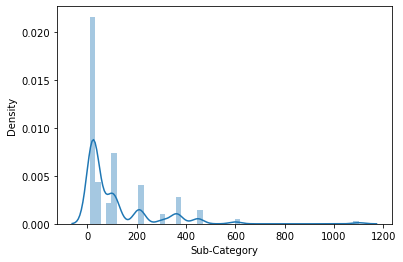

In [46]:
sns.distplot(data['Sub-Category'])

In [47]:
data[['Sales','Profit']]

,Sales,Profit
0,261.9600,41.9136
1,731.9400,219.5820
2,14.6200,6.8714
3,957.5775,-383.0310
4,22.3680,2.5164
...,...,...
9989,25.2480,4.1028
9990,91.9600,15.6332
9991,258.5760,19.3932
9992,29.6000,13.3200


In [48]:
X=data.drop(['Sales','Profit'],axis=1)
y=data[['Sales']]

In [49]:
# X=data.drop(['Sales'],axis=1)
# y=data[['Sales']]

In [50]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,Normalizer
from scipy.stats import boxcox
from scipy.special import inv_boxcox
standard=StandardScaler()
robust=RobustScaler()
minmax=MinMaxScaler()
normalize=Normalizer()
# X.iloc[:,:2]=standard.fit_transform(X.iloc[:,:2])

In [51]:
X

,City,State,Postal Code,Sub-Category,Product Name,Quantity,Discount,Shipping_days,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,Region_East,Region_South,Region_West,Category_Office Supplies,Category_Technology
0,61.000,76.300,60.820,306.82025,288.156,2,0.00,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,61.000,76.300,60.820,362.13600,792.935,3,0.00,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,69.456,61.020,74.712,14.94000,14.620,2,0.00,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,116.760,41.472,116.760,447.84000,1009.809,5,0.45,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,116.760,41.472,116.760,113.92800,55.920,2,0.20,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,37.608,41.472,28.176,41.96000,31.560,3,0.20,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9990,119.616,61.020,119.616,41.96000,91.960,2,0.00,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9991,119.616,61.020,119.616,209.97000,290.898,2,0.20,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9992,119.616,61.020,119.616,26.72000,26.640,4,0.00,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      9994 non-null   float64
 1   State                     9994 non-null   float64
 2   Postal Code               9994 non-null   float64
 3   Sub-Category              9994 non-null   float64
 4   Product Name              9994 non-null   float64
 5   Quantity                  9994 non-null   int64  
 6   Discount                  9994 non-null   float64
 7   Shipping_days             9994 non-null   int64  
 8   Ship Mode_Same Day        9994 non-null   float64
 9   Ship Mode_Second Class    9994 non-null   float64
 10  Ship Mode_Standard Class  9994 non-null   float64
 11  Segment_Corporate         9994 non-null   float64
 12  Segment_Home Office       9994 non-null   float64
 13  Region_East               9994 non-null   float64
 14  Region_S

In [53]:
def plot_curve(df,column):
    fig,axes=plt.subplots(2,4,figsize=(20,10))
    fig.suptitle(f"plot for {column}")
    sns.axisgrid
    sns.distplot(ax=axes[0,0],a=df[column],axlabel='normal')
    sns.distplot(ax=axes[0,1],a=np.log1p(df[column]),axlabel='logarithmic')
    sns.distplot(ax=axes[0,2],a=(df[column])**(1/2),axlabel='sqrt')
    sns.distplot(ax=axes[0,3],a=boxcox(df[column]+.0001)[0],axlabel='boxcox')
    # sns.distplot(ax=axes[0,3],a=normalize.fit_transform(df[[column]]),axlabel='normalize')
    sns.distplot(ax=axes[1,0],a=1/(df[column]+.01),axlabel='reciprocal')
    sns.distplot(ax=axes[1,1],a=robust.fit_transform(df[[column]]),axlabel='robustscaler')
    sns.distplot(ax=axes[1,2],a=minmax.fit_transform(df[[column]]),axlabel='minmaxscaler')
    sns.distplot(ax=axes[1,3],a=standard.fit_transform(df[[column]]),axlabel='standardscaler')   

In [54]:
dum['Discount']+0.00001

0       0.00001
1       0.00001
2       0.00001
3       0.45001
4       0.20001
         ...   
9989    0.20001
9990    0.00001
9991    0.20001
9992    0.00001
9993    0.00001
Name: Discount, Length: 9994, dtype: float64

In [55]:
tt,l=boxcox(dum['Discount']+0.00001)
l

0.018060670696249725

In [56]:
inv_boxcox(0.00001,l)

1.000010000049097

In [57]:
# tt,l=boxcox(dum['Discount']+0.0001)
# tt

In [58]:
inv_boxcox(tt,l)

array([1.0000e-05, 1.0000e-05, 1.0000e-05, ..., 2.0001e-01, 1.0000e-05,
       1.0000e-05])

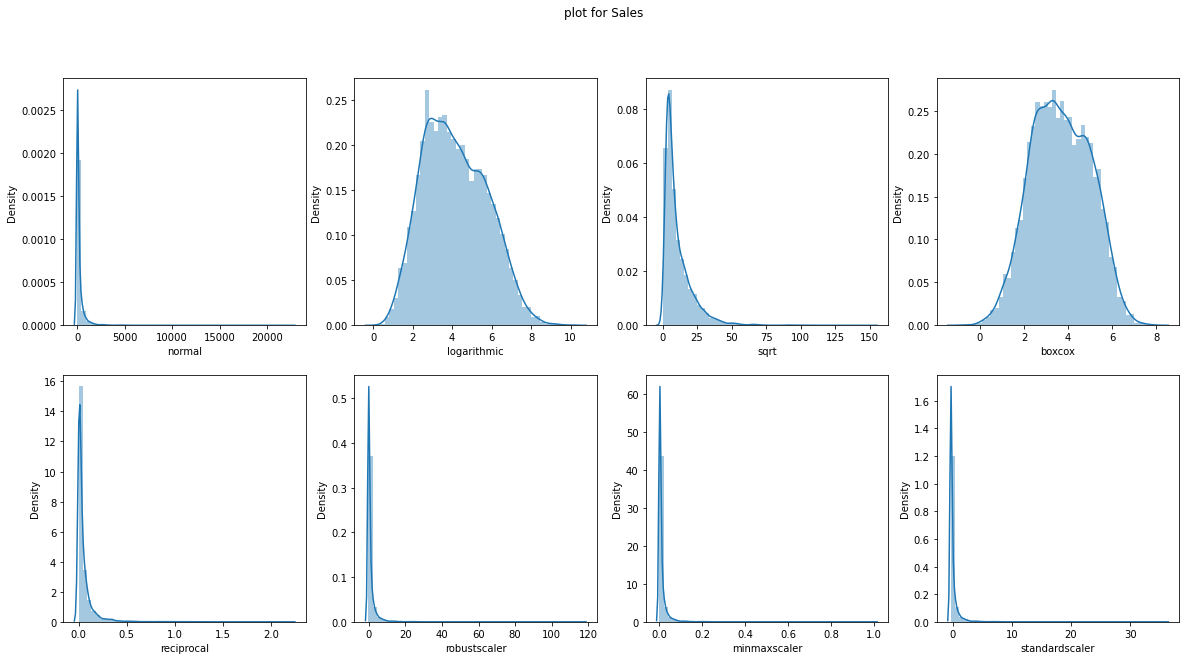

In [59]:
for columns in y:
    plot_curve(y,columns)
    # y[columns]=np.log1p(y[columns])

In [60]:
X.columns

Index(['City', 'State', 'Postal Code', 'Sub-Category', 'Product Name',
       'Quantity', 'Discount', 'Shipping_days', 'Ship Mode_Same Day',
       'Ship Mode_Second Class', 'Ship Mode_Standard Class',
       'Segment_Corporate', 'Segment_Home Office', 'Region_East',
       'Region_South', 'Region_West', 'Category_Office Supplies',
       'Category_Technology'],
      dtype='object')

In [61]:
# plot_curve(X,'Profit')

In [62]:
X['Discount'].describe()

count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

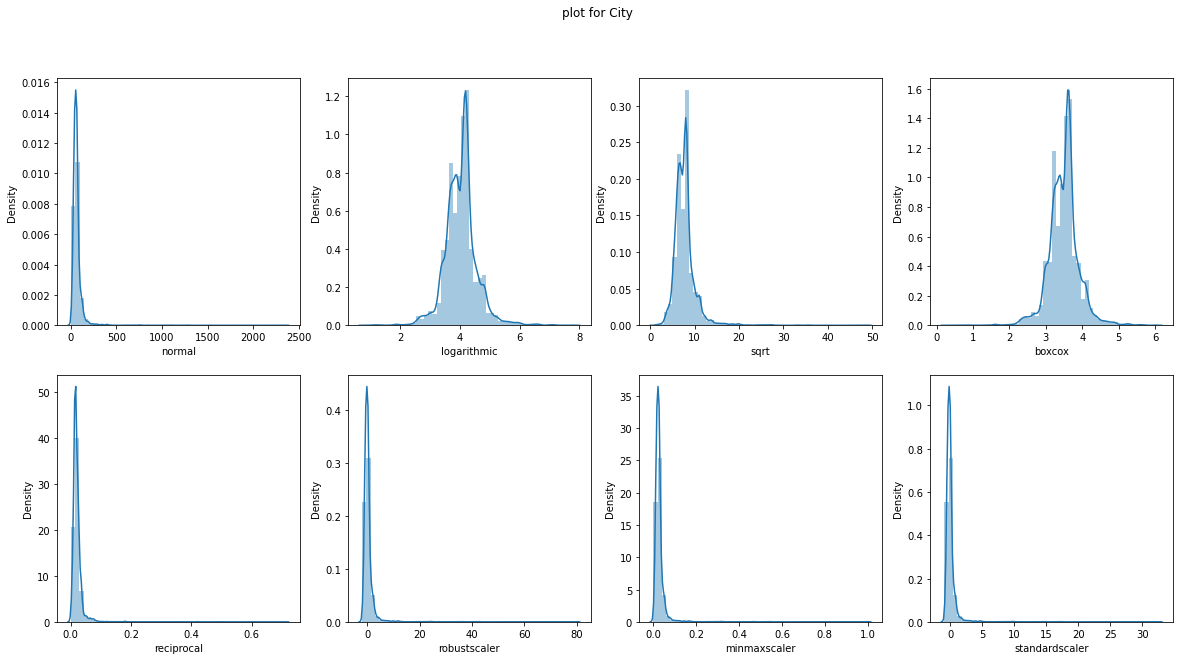

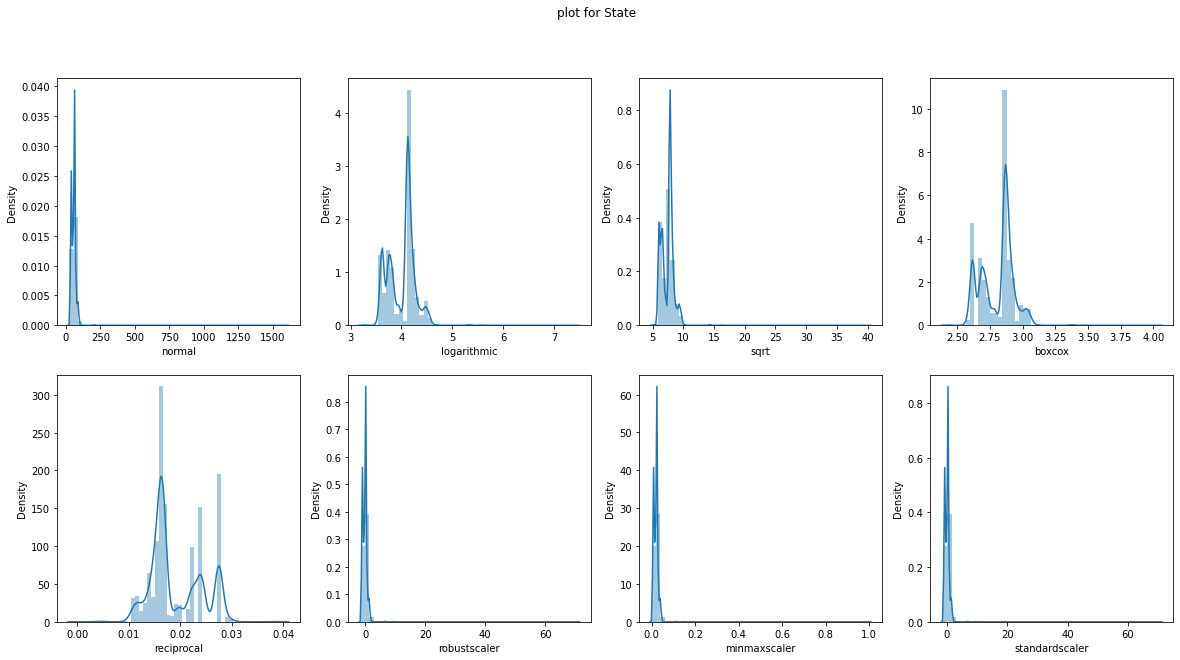

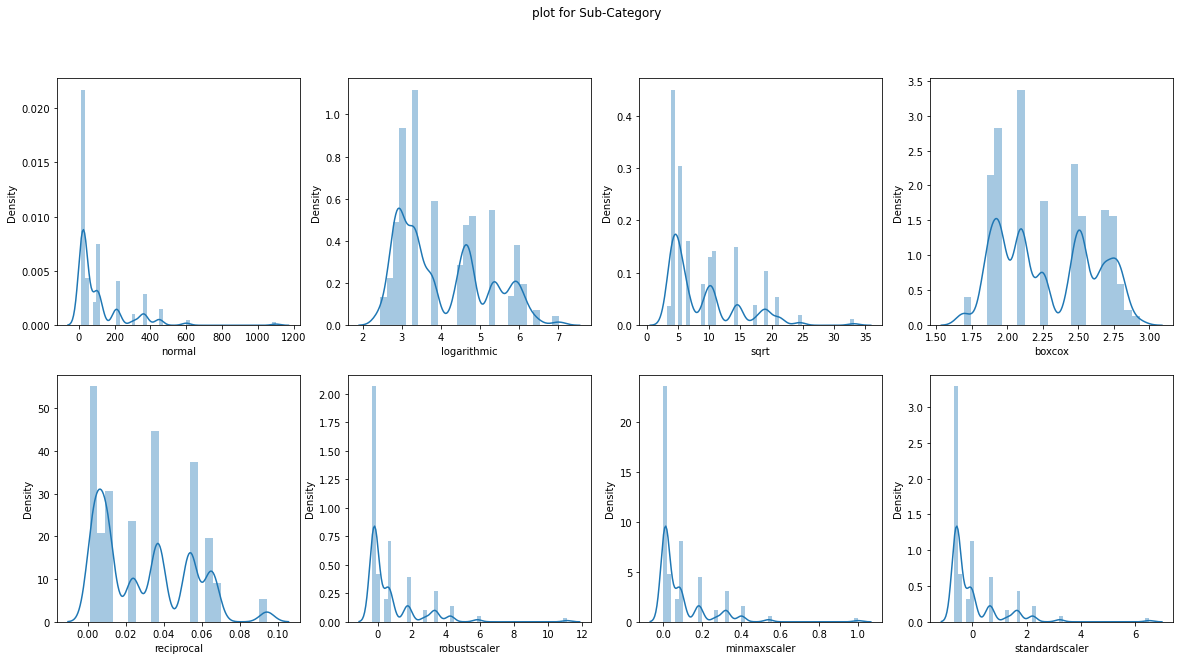

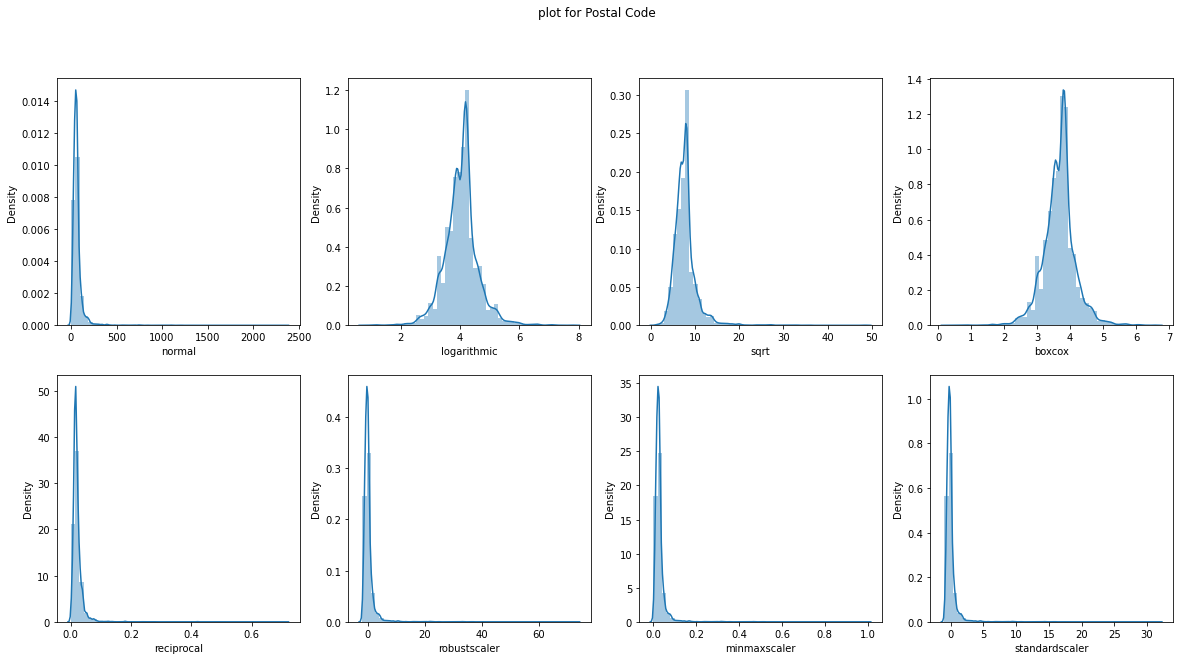

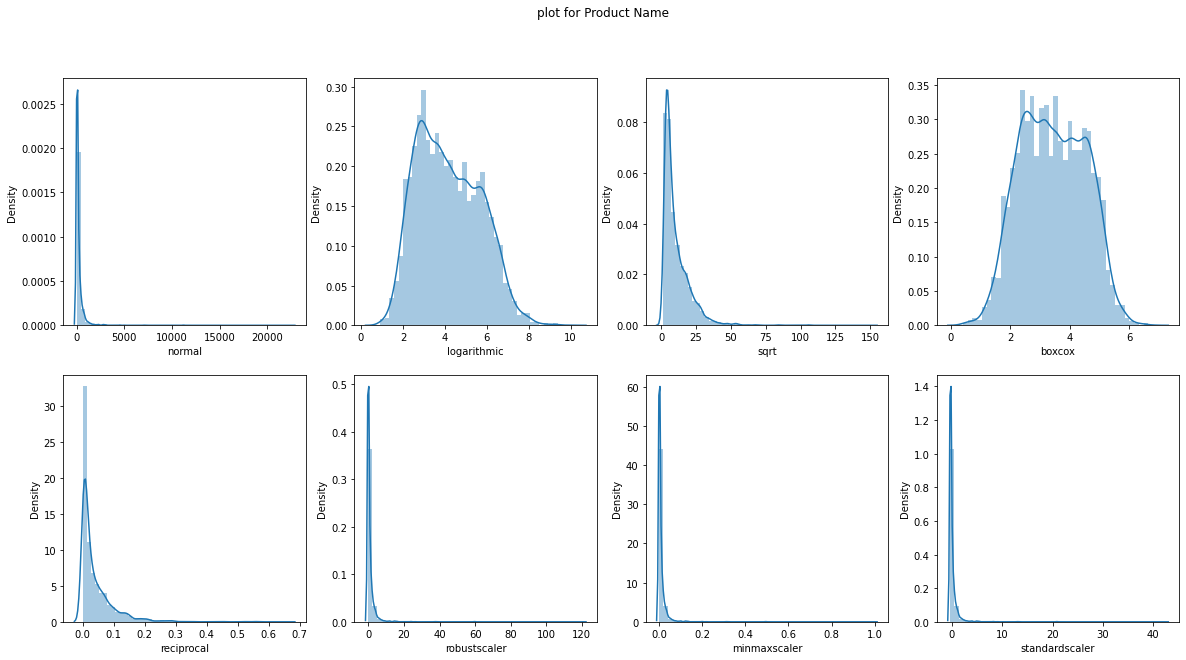

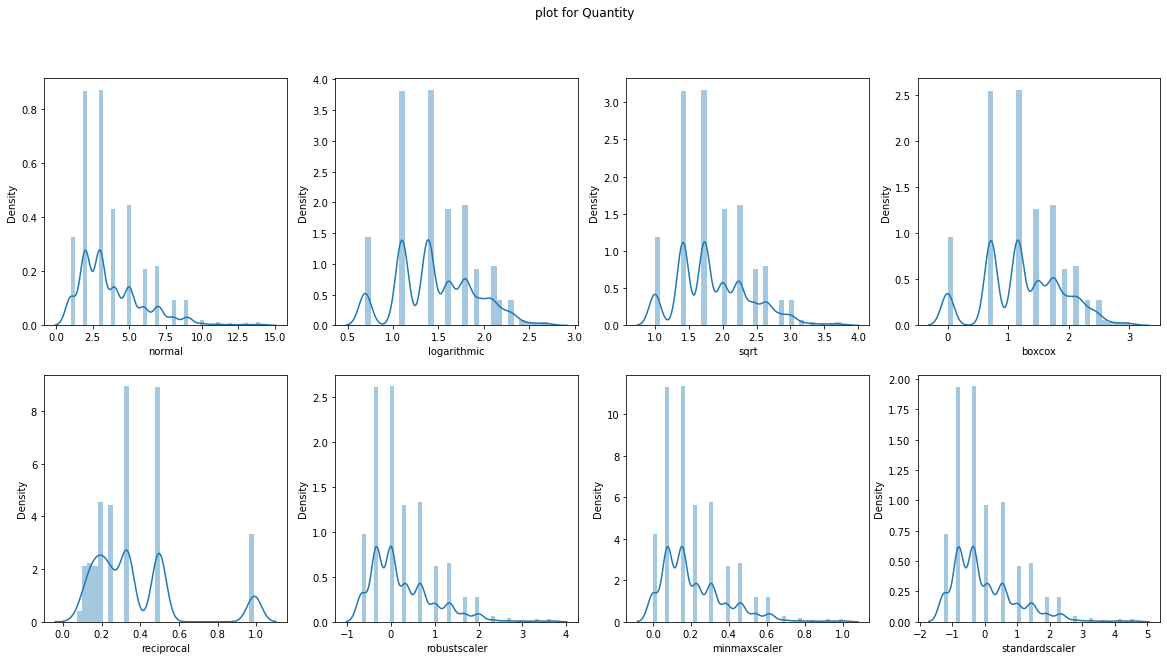

In [63]:
for columns in ['City', 'State', 'Sub-Category','Postal Code', 'Product Name', 'Quantity']:
    plot_curve(X,columns)

In [65]:
# X.iloc[:,:5].drop(['Quantity','Profit','Discount'],axis=1).columns

In [ ]:
# sns.distplot(X['Profit'])

In [ ]:
# IQR=X['Profit'].quantile(0.75)-X['Profit'].quantile(0.25)
# IQR

In [ ]:
# X['Profit'].describe()

In [ ]:
# upper_threshold=X['Profit'].median()+90*IQR
# lower_threshold=X['Profit'].median()-90*IQR
# upper_threshold,lower_threshold

In [ ]:
# X['Profit']=np.where(X['Profit']>upper_threshold,upper_threshold,X['Profit'])
# X['Profit']=np.where(X['Profit']<lower_threshold,lower_threshold,X['Profit'])

In [ ]:
# for columns in X.iloc[:,:5].columns:
#     X[columns]=minmax.fit_transform(X[[columns]])

In [ ]:
X.columns

In [66]:
for columns in ['City', 'Postal Code']:
    X[columns]=np.log1p(X[columns])

In [67]:
for columns in ['Sub-Category', 'Product Name','Discount']:
    X[columns]=boxcox(X[columns]+.00001)[0]

In [68]:
X['State']=1/X['State']

In [ ]:
# for columns in X.iloc[:,:5].drop(['Quantity','Profit','Discount'],axis=1).columns:
#     X[columns]=np.log1p(X[columns])

In [72]:
sns.distplot(boxcox(X['Discount']+0.00001)[0])

ValueError: Data must be positive.

In [ ]:
# X['Discount']=boxcox(X['Discount']+0.01)[0]

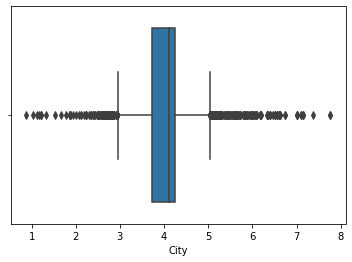

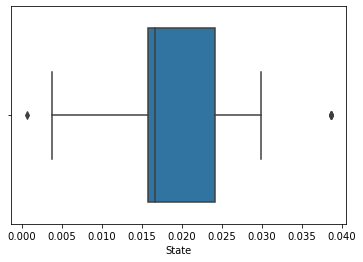

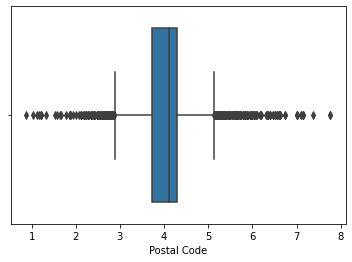

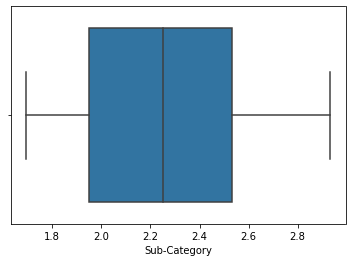

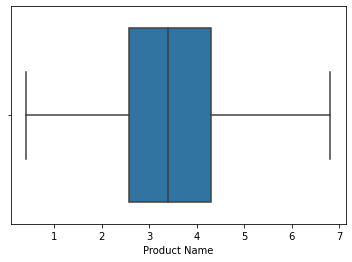

In [73]:
for columns in X.iloc[:,:5]:
    sns.boxplot(X[columns])
    plt.show()

In [ ]:
sns.boxplot(y['Sales'])

In [74]:
IQR=y.quantile(0.75)-y.quantile(0.25)
IQR

Sales    192.66
dtype: float64

In [75]:
upper_threshold=y.median()+3*IQR
lower_threshold=y.median()-3*IQR
upper_threshold,lower_threshold

(Sales    632.47
 dtype: float64,
 Sales   -523.49
 dtype: float64)

In [76]:
upper_boundary=y.mean()+6*y.std()
upper_boundary

Sales    3969.328604
dtype: float64

In [77]:
y['Sales']=np.where(y>upper_boundary,upper_boundary,y)

In [118]:
dum.iloc[3125]

Row ID                                      3126
Order ID                          CA-2015-121720
Order Date                   2015-06-11 00:00:00
Ship Date                    2015-06-12 00:00:00
Ship Mode                            First Class
Customer ID                             JE-15610
Customer Name                            Jim Epp
Segment                                Corporate
Country                            United States
City                                    Lakeland
State                                    Florida
Postal Code                                33801
Region                                     South
Product ID                       OFF-ST-10003816
Category                         Office Supplies
Sub-Category                             Storage
Product Name     Fellowes High-Stak Drawer Files
Sales                                    563.808
Quantity                                       4
Discount                                     0.2
Profit              

In [116]:
X.iloc[3125]

City                        4.083553
State                       0.024113
Postal Code                 4.083553
Sub-Category                2.532981
Product Name                4.850132
Quantity                    4.000000
Discount                   -1.586223
Shipping_days               1.000000
Ship Mode_Same Day          0.000000
Ship Mode_Second Class      0.000000
Ship Mode_Standard Class    0.000000
Segment_Corporate           1.000000
Segment_Home Office         0.000000
Region_East                 0.000000
Region_South                1.000000
Region_West                 0.000000
Category_Office Supplies    1.000000
Category_Technology         0.000000
Name: 3125, dtype: float64

In [ ]:
# pca.explained_variance_ratio_

In [ ]:
# ohe.get_feature_names_out()

In [78]:
dum=pd.read_excel('Sample - Superstore.xls')
dum['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [ ]:
X

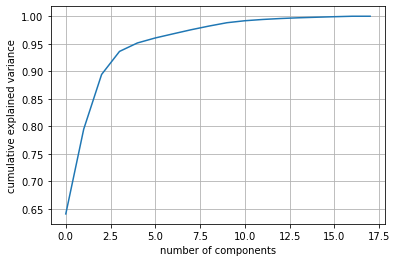

In [79]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [80]:
pca=PCA(n_components=15,random_state=42)
pca.fit(X)
X_pca=pca.transform(X)

In [81]:
from sklearn.feature_selection import SelectKBest,f_regression
Selector=SelectKBest(score_func=f_regression,k=14)
Selector.fit(X,y)
X_new=Selector.fit_transform(X,y)
X_new.shape
X_new=pd.DataFrame(Selector.fit_transform(X,y),columns=X.columns[Selector.get_support()])

In [82]:
y2=data[['Profit']]
y2

,Profit
0,41.9136
1,219.5820
2,6.8714
3,-383.0310
4,2.5164
...,...
9989,4.1028
9990,15.6332
9991,19.3932
9992,13.3200


In [ ]:
# from sklearn.feature_selection import SelectKBest,f_regression
# Selector=SelectKBest(score_func=f_regression,k=14)
# Selector.fit(X,y2)
# X_new=Selector.fit_transform(X,y2)
# X_new.shape
# X_new=pd.DataFrame(Selector.fit_transform(X,y2),columns=X.columns[Selector.get_support()])

In [120]:
X_new.iloc[3125]

City                        4.083553
State                       0.024113
Postal Code                 4.083553
Sub-Category                2.532981
Product Name                4.850132
Quantity                    4.000000
Discount                   -1.586223
Shipping_days               1.000000
Ship Mode_Second Class      0.000000
Ship Mode_Standard Class    0.000000
Segment_Corporate           1.000000
Region_East                 0.000000
Category_Office Supplies    1.000000
Category_Technology         0.000000
Name: 3125, dtype: float64

In [121]:
encoded

NameError: name 'encoded' is not defined

In [ ]:
test_frame = {'Ship Mode': 'First Class',
              'Segment': 'Corporate',
              'City': 'Lakeland',
              'State': 'Florida',
              'Postal Code': 33801,
              'Region': 'South',
              'Category': 'Office Supplies',
              'Sub-Category': 'Storage',
              'Product Name': 'Fellowes High-Stak Drawer Files',
              'Quantity': 4,
              'Discount': 0.2,
              'Shipping_days': 1}
test = pd.DataFrame([test_frame])
Test_predicition = testmodel(test)
print(Test_predicition)

In [ ]:
Selector.scores_

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=42)

In [84]:
linear=LinearRegression()
model=MultiOutputRegressor(linear)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.4168994828872751

In [85]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import cross_val_score,cross_val_predict
linear=LinearRegression()
mse=cross_val_score(model,X_train,y_train,scoring='r2',cv=5)
mse_=np.mean(mse)
mse_

0.4319703263932541

In [86]:
y_pred

array([[541.55128352],
       [146.64717658],
       [ 67.01144246],
       ...,
       [ -7.46036373],
       [429.5453612 ],
       [204.54191318]])

In [87]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)
ridge_regressor.fit(X_train,y_train)
ridge_regressor.best_params_,ridge_regressor.best_score_

({'alpha': 0.01}, 0.431985370839951)

In [88]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2',cv=5)
lasso_regressor.fit(X_train,y_train)
lasso_regressor.best_params_,lasso_regressor.best_score_

({'alpha': 0.01}, 0.4319775856741984)

In [89]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

In [90]:
from sklearn.tree import DecisionTreeRegressor
import xgboost
decision=DecisionTreeRegressor()
boost=xgboost.XGBRegressor()

In [91]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
}

In [92]:
decision_test=RandomizedSearchCV(boost,param_distributions=params,n_iter=10,\
                                 scoring='r2',n_jobs=-1,cv=5,verbose=6)

In [93]:
decision_test.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__objective', 'estimator__base_score', 'estimator__booster', 'estimator__callbacks', 'estimator__colsample_bylevel', 'estimator__colsample_bynode', 'estimator__colsample_bytree', 'estimator__early_stopping_rounds', 'estimator__enable_categorical', 'estimator__eval_metric', 'estimator__gamma', 'estimator__gpu_id', 'estimator__grow_policy', 'estimator__importance_type', 'estimator__interaction_constraints', 'estimator__learning_rate', 'estimator__max_bin', 'estimator__max_cat_to_onehot', 'estimator__max_delta_step', 'estimator__max_depth', 'estimator__max_leaves', 'estimator__min_child_weight', 'estimator__missing', 'estimator__monotone_constraints', 'estimator__n_estimators', 'estimator__n_jobs', 'estimator__num_parallel_tree', 'estimator__predictor', 'estimator__random_state', 'estimator__reg_alpha', 'estimator__reg_lambda', 'estimator__sampling_method', 'estimator__scale_pos_weight', 'estimator__subsample', 'estimator__tree_method', 'estimator

In [ ]:
pip freeze requirements.txt

In [94]:
decision_test.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='r2', verbose=6)

In [95]:
decision_test.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [96]:
decision_test.best_params_

{'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.25,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [97]:
from numpy import nan

In [98]:
regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1)

In [99]:
xgboost_score=cross_val_score(boost,X_train,y_train,cv=10)
xgboost_score

array([0.93633485, 0.92882345, 0.90316157, 0.92095521, 0.87776875,
       0.89049457, 0.89733719, 0.93423307, 0.87118811, 0.8940101 ])

In [100]:
xgboost_score.mean()

0.9054306878401235

In [101]:
xgboost_test=boost.fit(X_train,y_train)

In [102]:
xgboost_pred=xgboost_test.predict(X_test)
xgboost_pred

array([562.5938  ,  43.40212 ,  30.914152, ...,  16.89179 , 331.17508 ,
        60.96805 ], dtype=float32)

In [107]:
test=xgboost_test.predict(X_train)
y_train['pred']=test
y_train['error']=y_train['Sales']-y_train['pred']
y_train

,Sales,pred,error
3428,215.148,246.680557,-31.532557
3538,9.450,10.793879,-1.343879
409,9.680,5.084554,4.595446
4883,171.200,181.575241,-10.375241
3846,141.400,155.399124,-13.999124
...,...,...,...
5734,25.160,26.328327,-1.168327
5191,23.160,29.868414,-6.708414
5390,26.352,31.295626,-4.943626
860,7.360,7.022451,0.337549


In [103]:
r2_score(y_train,xgboost_test.predict(X_train))

0.9965661069058915

In [104]:
import pickle
pickle.dump(xgboost_test,open('xgboost.pkl','wb'))

In [105]:
test=pickle.load(open('xgboost.pkl','rb'))
test.predict(X_test)

array([562.5938  ,  43.40212 ,  30.914152, ...,  16.89179 , 331.17508 ,
        60.96805 ], dtype=float32)

In [106]:
r2_score(y_test,xgboost_pred)

0.9160130416221393

In [ ]:
param={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
}

In [ ]:
decision.get_params()

In [ ]:
decision_tree=cross_val_score(decision,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
decision_tree

In [ ]:
-decision_tree.mean()

In [ ]:
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor
adaboost=AdaBoostRegressor()
bagging=BaggingRegressor()
gradient=GradientBoostingRegressor()
random_=RandomForestRegressor()

In [ ]:
adaboost_test=cross_val_score(adaboost,X_train,y_train,cv=10,scoring='r2')
bagging_test=cross_val_score(bagging,X_train,y_train,cv=10,scoring='r2')
gradient_test=cross_val_score(gradient,X_train,y_train,cv=10,scoring='r2')
random_test=cross_val_score(random_,X_train,y_train,cv=10,scoring='r2')

In [ ]:
adaboost_test.mean(),bagging_test.mean(),gradient_test.mean(),random_test.mean()

In [ ]:
gradient_test=gradient.fit(X_train,y_train)

In [ ]:
gradient_pred=gradient_test.predict(X_test)

In [ ]:
r2_score(y_test,gradient_pred)

In [ ]:
final_df=y_test.merge(pd.DataFrame(xgboost_pred,index=y_test.index,columns={'Sales':0}),on=y_test.index)
final_df.set_index('key_0').rename_axis('')

In [ ]:
from sklearn import svm
svm_reg=svm.SVR(kernel='linear',C=1)

In [ ]:
svm_test= svm_reg.fit(X_train, y_train)

In [ ]:
svm_test.score(X_test,y_test)

In [ ]:
svm_scores=cross_val_score(svm_reg,X_train,y_train,cv=10)

In [ ]:
svm_scores.mean()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=10)

In [ ]:
knn_test=knn.fit(X_train,y_train)
knn_test.score(X_train,y_train)

In [ ]:
knn_pred=knn_test.predict(X_test)

In [ ]:
r2_score(y_test,knn_pred)

In [ ]:
accuracy_rate=[]

for i in range(1,40):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    score=r2_score(y_test,pred_i)
    accuracy_rate.append(score.mean())

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')